In [1]:
# Install the necessary dependencies
%pip install datasets
%pip install transformers
%pip install spacy
%pip install torch
%pip install torchtext
%pip install spacy-transformers
%pip install transformers[torch]
%pip install seqeval
%pip instlall word2vec
%pip install gensim
%pip install -qq "spacy >= 3.0.6"
%pip install -qU wandb
%pip install scikit-learn
%pip install sklearn_crfsuite

  Using cached datasets-2.19.1-py3-none-any.whl.metadata (19 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pyarrow-16.0.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (3.0 kB)
  Using cached pyarrow_hotfix-0.6-py3-none-any.whl.metadata (3.6 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 8.2 MB/s eta 0:00:00
  Using cached xxhash-3.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached multiprocess-0.70.16-py310-none-any.whl.metadata (7.2 kB)
  Using cached fsspec-2024.3.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached aiohttp-3.9.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.5 kB)
  Using cached hu

In [8]:
%pip install matplotlib
%pip install seaborn
%pip install scipy==1.10.1
%pip install nltk
%pip install fairscale
%pip install deepspeed
%pip install --upgrade huggingface_hub

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### **Imports**

In [2]:
from datasets import load_metric, load_dataset
from transformers import AutoTokenizer
import numpy as np
import torch.cuda
import torch
import transformers
from transformers import EarlyStoppingCallback
from tqdm.notebook import tqdm
from datasets import ClassLabel, Sequence
import random
import pandas as pd
import torch
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from gensim.test.utils import common_texts, get_tmpfile, simple_preprocess
import gensim

/home/sevi/AdvancedCV/.conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sevi/AdvancedCV/.conda/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/sevi/AdvancedCV/.conda/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [3]:
from datasets import load_metric, load_dataset
from transformers import AutoTokenizer
# from transformers import RobertaTokenizer, RobertaModel, RobertaTokenizerFast ## If Using RoBERTa
# from transformers import AlbertTokenizer, AlbertModel, AlbertTokenizerFast ## If using ALBERT
from transformers import BertTokenizer, BertModel, BertTokenizer ## If using BERT
from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer
from transformers import DataCollatorForTokenClassification
import numpy as np
import wandb
import transformers
from transformers import EarlyStoppingCallback
from tqdm.notebook import tqdm
from datasets import ClassLabel, Sequence
import random
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

/home/sevi/AdvancedCV/.conda/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [4]:
from transformers import AutoTokenizer
from transformers import RobertaTokenizer, RobertaModel, RobertaTokenizerFast ## If Using RoBERTa
# from transformers import AlbertTokenizer, AlbertModel, AlbertTokenizerFast ## If using ALBERT
from transformers import BertTokenizer, BertModel, BertTokenizer ## If using BERT
from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer
from transformers import DataCollatorForTokenClassification
from transformers import AutoTokenizer, AutoModelForMaskedLM

In [5]:
from huggingface_hub import login
login(token="credentials")

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /home/sevi/.cache/huggingface/token
Login successful


In [6]:
#WANDB for hyperparam tuning
import wandb
wandb.login()
%env WANDB_LOG_MODEL=true
%env WANDB_WATCH=all
# %env TOKENIZERS_PARALLELISM = False ## If you are using multiple GPUs, set this to True
# sweep_config = {
#     'method': 'random'
#     }
# metric = {
#     'name': 'loss',
#     'goal': 'minimize'   
#     }

# sweep_config['metric'] = metric
# parameters_dict ={
#     'weight_decay': {
#         # a flat distribution between 0 and 0.1
#         'distribution': 'uniform',
#         'min': 0,
#         'max': 0.0001
#       },
#     'learning_rate': {
#         # a flat distribution between 0 and 0.1
#         'distribution': 'uniform',
#         'min': 0,
#         'max': 0.1
#       },
#     'batch_size': {
#         # integers between 32 and 256
#         # with evenly-distributed logarithms 
#         'distribution': 'q_log_uniform_values',
#         'q': 2,
#         'min': 4,
#         'max': 8,
#       }
# }
# sweep_id = wandb.sweep(sweep_config, project="NLP")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: sebimomir (sevixdd). Use `wandb login --relogin` to force relogin


env: WANDB_LOG_MODEL=true
env: WANDB_WATCH=all


In [17]:
import torch
torch.cuda.is_available()
device = torch.device("cpu")

1.
Analyse and visualise the dataset – produce charts and document observations (5 marks).
Use papers in the reference to think of how you can analyse the dataset.

### **Data Processing:**

In [7]:
from datasets import load_dataset, load_metric
#dataset = load_dataset("surrey-nlp/PLOD-CW")
dataset = load_dataset("surrey-nlp/PLOD-filtered")

In [7]:
from datasets import load_dataset, load_metric
datasets = load_dataset("surrey-nlp/PLOD-CW")

**Data Visualization:**

In [53]:
##Vocabulary
import string

def get_vocabs(dataset):
    """Build vocabulary from an iterable of datasets objects

    Args:
        datasets: a list of dataset objects

    Returns:
        a set of all the words in the dataset

    """
    print("Building vocab...")
    punct = set(string.punctuation)
    #all words without punctuation
    punc_words = []
    #all words
    all_words = []
    #unique words
    vocab_words = set()
    for words in dataset:
      vocab_words.update(words)
      all_words.extend(words)
      punc_words.extend([w for w in words if w not in punct])
    print("- Number of distinct. {} tokens".format(len(vocab_words)))
    print("- Number of words. {} tokens".format(len(all_words)))
    print("- Number of words without punctuation. {} tokens".format(len(punc_words)))
    return vocab_words, all_words, punc_words

In [8]:

#pos_list = datasets["train"].features[f"pos_tags"].feature.names
#label_list = datasets["train"].features[f"ner_tags"].feature.names
labels_vocab = {'B-O': 0, 'B-AC': 1, 'B-LF': 3, 'I-LF': 4}
pos_tag_map ={'ADJ' : 0, 'ADP' : 1, 'ADV' : 2, 'AUX' : 3, 'CONJ' : 4, 'CCONJ' : 5, 'DET' : 6, 'INTJ' : 7, 'NOUN' : 8, 'NUM' : 9, 'PART' : 10, 'PRON' : 11, 'PROPN' : 12, 'PUNCT' : 13, 'SCONJ' : 14, 'SYM' : 15, 'VERB' : 16, 'X' : 17, 'SPACE' : 18}

label_list = dataset["train"].features[f"ner_tags"].feature.names
#label_list = ['B-O', 'B-AC' , 'B-LF', 'I-LF']
short_dataset = dataset["train"]
print(len(short_dataset['id']))
example = dataset["train"]
test = dataset["test"]
print(example)
task = "ner"

112652
Dataset({
    features: ['id', 'tokens', 'pos_tags', 'ner_tags'],
    num_rows: 112652
})


In [31]:
# Build Vocabulary
vocab_sentence = example["tokens"]
vocab, all_words, punc_words = get_vocabs(vocab_sentence)

Building vocab...
- Number of distinct. 9133 tokens
- Number of words. 40000 tokens
- Number of words without punctuation. 30582 tokens


In [146]:
token_list = datasets["train"].features[f"tokens"].feature
print(token_list)

Value(dtype='string', id=None)


In [55]:
def ner_tags_count(dataset, task):
    dict_tags = {}
    for i, label in enumerate(dataset[task]):
        for j in label:
            if j not in dict_tags:
                dict_tags[j] = 1
            else:
                 dict_tags[j] += 1
    return dict_tags

In [56]:
def changing_keys(initial_dict, task):
    ner_label = ['B-O', 'B-AC' , 'B-LF', 'I-LF']
    pos_label = ['ADJ', 'ADP', 'ADV', 'AUX', 'CONJ', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X', 'SPACE']
    if task == 'ner_tags':
        new_dict = dict(zip(ner_label, list(initial_dict.values())))
    else:
        new_dict = dict(zip(pos_label, list(initial_dict.values())))
    return new_dict

In [57]:
def precentage_calc(dict, task):
    tag_count = ner_tags_count(example, task)
    tag_count = changing_keys(tag_count, task)
    total = sum(tag_count.values())
    precentages = {category: (value / total) * 100 for category, value in tag_count.items()}
    raw_value = list(tag_count.values())
    categories = list(tag_count.keys())
    percent_value = list(precentages.values())
    return raw_value, categories, percent_value



In [58]:
ner_value, ner_categ, ner_percent = precentage_calc(example, 'ner_tags')
print(ner_value, ner_categ, ner_percent)
pos_value, pos_categ, pos_percent = precentage_calc(example, 'pos_tags')
print(pos_value, pos_categ, pos_percent)
#pos_count = ner_tags_count(example, 'pos_tags')

[4378676, 184042, 407268, 307003] ['B-O', 'B-AC', 'B-LF', 'I-LF'] [82.97678846781754, 3.4876328148495293, 7.717810289163006, 5.817768428169928]
[80423, 1134327, 1317685, 117415, 347332, 31931, 62579, 40986, 257929, 426179, 146919, 470916, 204332, 40358, 569693, 27639, 346] ['ADJ', 'ADP', 'ADV', 'AUX', 'CONJ', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB'] [1.5240319811165042, 21.49572417149249, 24.970395049146397, 2.2250378009126037, 6.5820110672961425, 0.6050988546688272, 1.1858846019955698, 0.7766929209062213, 4.887806284985623, 8.07617753230109, 2.784144518777659, 8.923952655576883, 3.8721323845852242, 0.7647921949429873, 10.795796618109305, 0.5237645937863429, 0.006556769400125715]


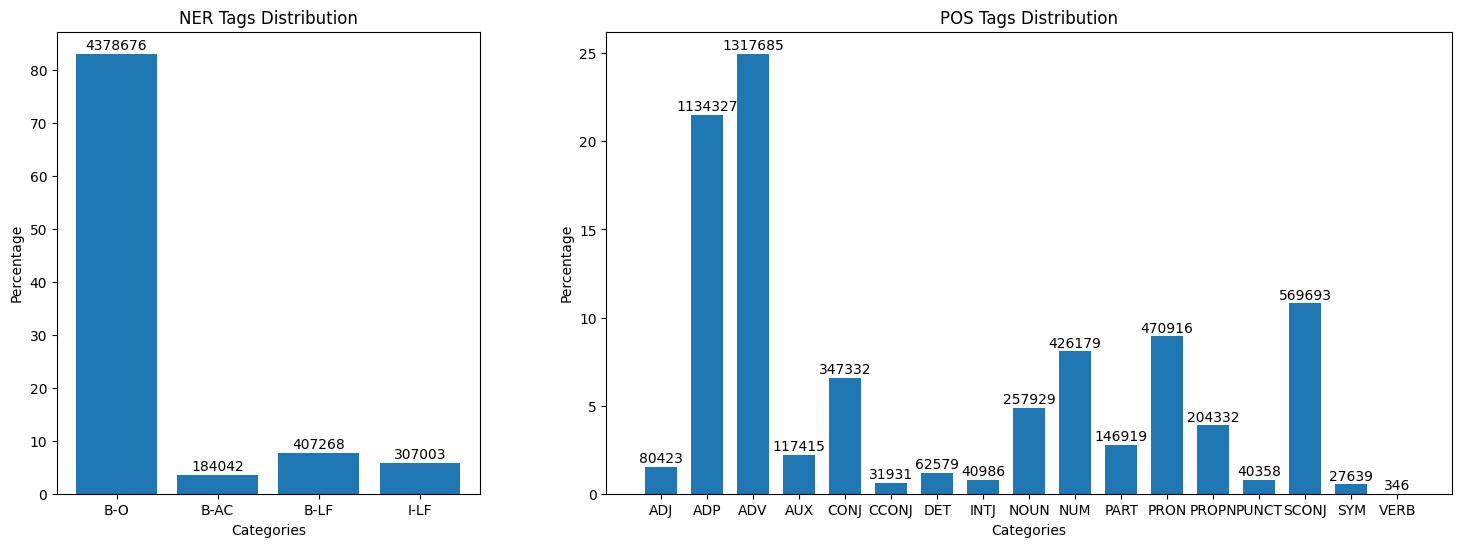

In [59]:
import pylab

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter



# Plotting
fig, ax = plt.subplots(1, 2, figsize=(18, 6), width_ratios=[1, 2])

#NER Plot

ax[0].set_title('NER Tags Distribution')
ax[0].set_xlabel('Categories')
ax[0].set_ylabel('Percentage')

ax[0].bar(ner_categ, ner_percent, width=0.8)
i=0
for rect in ax[0].patches: 
    height = rect.get_height() 
    y_value = ner_value[i]
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax[0].annotate(label, (x_value, height), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
    i += 1

#POS tags plot

ax[1].set_title('POS Tags Distribution')
ax[1].set_xlabel('Categories')
ax[1].set_ylabel('Percentage')

ax[1].bar(pos_categ, pos_percent, width=0.7)
i=0
for rect in ax[1].patches: 
    height = rect.get_height() 
    y_value = pos_value[i]
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax[1].annotate(label, (x_value, height), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
    i += 1

plt.show()


Most common String and their counts:


[nltk_data] Downloading package punkt to /home/sevi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


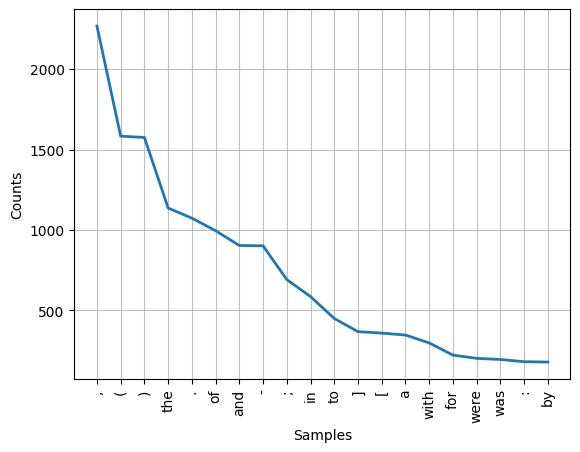

[(',', 2268), ('(', 1583), (')', 1575), ('the', 1136), ('.', 1073), ('of', 995), ('and', 903), ('-', 901), (';', 691), ('in', 585)]

Most common Words and their counts:


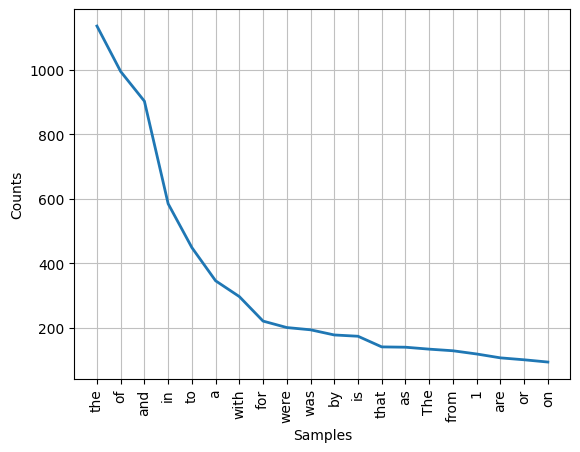

[('the', 1136), ('of', 995), ('and', 903), ('in', 585), ('to', 449), ('a', 346), ('with', 297), ('for', 221), ('were', 201), ('was', 194)]


In [147]:
from nltk import FreqDist
import nltk
nltk.download('punkt')
print("Most common String and their counts:")
#words = nltk.tokenize.word_tokenize(vocab_sentence)
fdist = FreqDist(all_words)
fdist.plot(20)
print(fdist.most_common(10))
print("\nMost common Words and their counts:")
fdist = FreqDist(punc_words)
fdist.plot(20)
print(fdist.most_common(10))
#word frequency

## TF-IDF

In [148]:
def calculate_tf(token_count, bow):
    tf = {}  #creates an empty dictionary where key,value pair is stored
    num_bow = len(bow)

    for token, count in token_count.items():
        # TODO - Calculate the term frequency using the formula:
        # "count of term in the document" / "total number of words in the document"
        tf[token] = count / float(num_bow)


    return tf

def _get_tf(tokens, vocab):

    token_count = dict.fromkeys(vocab, 0)#fromkeys() method returns a dictionary with the specified keys and the specified value
    for token in tokens:
        token_count[token] += 1
    return calculate_tf(token_count, tokens)

In [149]:
tf = _get_tf(punc_words, vocab)

In [150]:

import math

def calculate_idf(docs):
    N = len(docs)

    # TODO 1 - Initialise a new dictionary with the keys from the documents and the values set to 0
    idf = dict.fromkeys(docs.keys(), 0)

    N = 1  # Since there's only one document
    printcounter = 0
    printcounter1 = 0
    for word, val in docs.items():
        idf[word] += 1
        if (printcounter == 100):
         # print(word, idf[word], val,docs.items(),"\n")
          printcounter = 0
        printcounter += 1
    for word, val in idf.items():
        idf[word] = 1 + math.log((1+N) / (float(val)+1))
        if (printcounter1 == 100):
          #  print(word, idf[word], val,idf.items(),"\n") 
            printcounter1 = 0
        printcounter1 += 1

    return idf
def calculate_tfidf(tfs, idfs):
    tfidf = {}

    for word, val in tfs.items():
        # TODO - Calculate and store the tfidf
        tfidf[word] = val * idfs[word]

    return tfidf


In [151]:
tfs = [tf]
idfs = calculate_idf(tf)

tfidf = calculate_tfidf(tf, idfs)
#print(tfidf)

In [152]:
import pandas as pd

print(max(tfidf.values()))

0.0371460336145445


In [154]:

from collections import Counter

print("\nTop 8 most relevant tf-idf words in PLOD-CW:")

xd = dict(Counter(tfidf).most_common(8))

my_dictionary = {k: round(v, 6) for k, v in xd.items()}
print(my_dictionary,"\n")


Top 8 most relevant tf-idf words in PLOD-CW:
{'the': 0.037146, 'of': 0.032535, 'and': 0.029527, 'in': 0.019129, 'to': 0.014682, 'a': 0.011314, 'with': 0.009712, 'for': 0.007226} 



**Deep learning and transformer models:**

## PLOD CW DATASET

In [9]:
#PLODCW Tokenizing
# Flip ner tags from B-O to 0
labels_vocab_reverse = {v: k for k, v in labels_vocab.items()}

print(labels_vocab_reverse)
print(labels_vocab)

print(labels_vocab_reverse[0])
print(labels_vocab['B-O'])

# print(example["ner_tags"])
# print(labels_vocab_reverse)

# for i, label in enumerate(example["ner_tags"]): #example["ner_tags"]:
#     for j in range(len(label)):
#         if example["ner_tags"][i][j]== 'B-O':
#             example["ner_tags"][i][j] = 0
#             print("yes", example["ner_tags"][i][j])
#         elif example["ner_tags"][i][j] == 'B-AC':
#             example["ner_tags"][i][j] = 1
#         elif example["ner_tags"][i][j] == 'B-LF':
#             example["ner_tags"][i][j] = 3
#         else:
#             example["ner_tags"][i][j] = 4


{0: 'B-O', 1: 'B-AC', 3: 'B-LF', 4: 'I-LF'}
{'B-O': 0, 'B-AC': 1, 'B-LF': 3, 'I-LF': 4}
B-O
0


In [10]:
from transformers import AutoTokenizer
task = "ner"
model_checkpoint = "roberta-base"
batch_size = 8
#the tokenizer below is the checkpoint  
tokenizer = AutoTokenizer.from_pretrained("roberta-base", add_prefix_space=True) 

In [11]:
import transformers
assert isinstance(tokenizer, transformers.PreTrainedTokenizerFast) 

In [12]:
label_all_tokens = True

In [13]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)

    labels = []
    for i, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            # Special tokens(i.e.[CLS],[SEP]) have a word id that is None. We set the label to -100 so they are automatically
            # ignored in the loss function.
            if word_idx is None:
                label_ids.append(-100)
            # We set the label for the first token of each word.
            elif word_idx != previous_word_idx:
                label_ids.append(labels_vocab[str(label[word_idx])])
            # For the other tokens in a word, we set the label to either the current label or -100, depending on
            # the label_all_tokens flag.
            else:
                label_ids.append(labels_vocab[str(label[word_idx])] if label_all_tokens else -100)
            previous_word_idx = word_idx
        
        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [14]:
train_tokenized = example.map(tokenize_and_align_labels, batched=True)
val_tokenized = test.map(tokenize_and_align_labels, batched=True)
test_tokenized = test.map(tokenize_and_align_labels, batched=True)

## PLOD FILTERED DATASET

In [9]:
label_list = dataset["train"].features[f"ner_tags"].feature.names

In [10]:
task = "ner" # Should be one of "ner", "pos" or "chunk"
model_checkpoint = "roberta-base" ## YOUR LANGUAGE MODEL NAME OR FINETUNED MODEL NAME FOR INFERENCING GOES HERE
batch_size = 4

In [11]:
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, add_prefix_space=True)
assert isinstance(tokenizer, transformers.PreTrainedTokenizerFast)
example = dataset["train"][4]

/home/sevi/AdvancedCV/.conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [12]:
tokenized_input = tokenizer(example["tokens"], is_split_into_words=True)
tokens = tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])

In [13]:
word_ids = tokenized_input.word_ids()
aligned_labels = [-100 if i is None else example[f"{task}_tags"][i] for i in word_ids]
print(len(aligned_labels), len(tokenized_input["input_ids"]))

50 50


In [14]:
label_all_tokens = True

In [15]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True, max_length=500) ## For some models, you may need to set max_length to approximately 500.

    labels = []
    for i, label in enumerate(examples[f"{task}_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            # Special tokens have a word id that is None. We set the label to -100 so they are automatically
            # ignored in the loss function.
            if word_idx is None:
                label_ids.append(-100)
            # We set the label for the first token of each word.
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])
            # For the other tokens in a word, we set the label to either the current label or -100, depending on
            # the label_all_tokens flag.
            else:
                label_ids.append(label[word_idx] if label_all_tokens else -100)
            previous_word_idx = word_idx

        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [16]:

def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True,  max_length=500) ## For some models, you may need to set max_length to approximately 500.

    labels = []
    for i, label in enumerate(examples[f"{task}_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            # Special tokens have a word id that is None. We set the label to -100 so they are automatically
            # ignored in the loss function.
            if word_idx is None:
                label_ids.append(-100)
            # We set the label for the first token of each word.
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])
            # For the other tokens in a word, we set the label to either the current label or -100, depending on
            # the label_all_tokens flag.
            else:
                label_ids.append(label[word_idx] if label_all_tokens else -100)
            previous_word_idx = word_idx

        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [17]:
# train_tokenized = dataset['train'].map(tokenize_and_align_labels, batched=True)
# val_tokenized = dataset['validation'].map(tokenize_and_align_labels, batched=True)
# test_tokenized = dataset['test'].map(tokenize_and_align_labels, batched=True)
tokenized_datasets = dataset.map(tokenize_and_align_labels, batched=True)

Map: 100%|██████████| 24140/24140 [00:02<00:00, 11402.25 examples/s]


In [18]:
from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer

#model = AutoModelForTokenClassification.from_pretrained("roberta-base", num_labels=len(label_list), label2id=labels_vocab, id2label=labels_vocab_reverse)
model = AutoModelForTokenClassification.from_pretrained(model_checkpoint, num_labels=len(label_list))

Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

# def train(config=None):
#     # Initialize a new wandb run
#     with wandb.init(config=config):
#         # If called by wandb.agent, as below,
#         # this config will be set by Sweep Controller
#         config = wandb.config



In [ ]:
run = wandb.init()
artifact = run.use_artifact('sevixdd/NLP/model-mnltvr88:v0', type='model')
artifact_dir = artifact.download()
run.finish()

In [19]:
model_name = model_checkpoint.split("/")[-1]
args = TrainingArguments(
    f"{model_name}-finetuned-{task}",
    report_to="wandb",
    # evaluation_strategy = "epoch", ## Instead of focusing on loss and accuracy, we will focus on the F1 score
    evaluation_strategy ='steps',
    eval_steps = 7000,
    save_total_limit = 3,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=4,
    num_train_epochs=6,
    weight_decay=0.001,
    save_steps=35000,
    push_to_hub=True,
    metric_for_best_model = 'f1',
    load_best_model_at_end=True
)

In [20]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer)

In [21]:
metric = load_metric("seqeval")

/tmp/ipykernel_8333/152412463.py:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("seqeval")
/home/sevi/AdvancedCV/.conda/lib/python3.10/site-packages/datasets/load.py:759: FutureWarning: The repository for seqeval contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/seqeval/seqeval.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [22]:
labels = [i for i in example[f"{task}_tags"]]
metric.compute(predictions=[labels], references=[labels])


/home/sevi/AdvancedCV/.conda/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: 3 seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home/sevi/AdvancedCV/.conda/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: 4 seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home/sevi/AdvancedCV/.conda/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: 0 seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home/sevi/AdvancedCV/.conda/lib/python3.10/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: 1 seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/home/sevi/AdvancedCV/.conda/lib/python3.10/site-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zer

{'overall_precision': 0.0,
 'overall_recall': 0.0,
 'overall_f1': 0.0,
 'overall_accuracy': 1.0}

In [23]:
import numpy as np

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

In [24]:
trainer = Trainer(
   
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks = [EarlyStoppingCallback(early_stopping_patience=3)]
)

/home/sevi/AdvancedCV/.conda/lib/python3.10/site-packages/accelerate/accelerator.py:446: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False)
  warnings.warn(


In [25]:
trainer.train()
trainer.save_model('/home/sevi/NLPCW/roberta/roberta-finetuned-ner')

  0%|          | 502/168978 [00:22<5:12:56,  8.97it/s]

{'loss': 0.2958, 'learning_rate': 1.9940820698552478e-05, 'epoch': 0.02}


  1%|          | 1002/168978 [00:44<4:59:32,  9.35it/s]

{'loss': 0.2167, 'learning_rate': 1.9881641397104948e-05, 'epoch': 0.04}


  1%|          | 1503/168978 [01:06<4:17:48, 10.83it/s]

{'loss': 0.1903, 'learning_rate': 1.9822462095657424e-05, 'epoch': 0.05}


  1%|          | 2004/168978 [01:27<4:01:58, 11.50it/s]

{'loss': 0.1789, 'learning_rate': 1.97632827942099e-05, 'epoch': 0.07}


  1%|▏         | 2502/168978 [01:49<5:26:33,  8.50it/s]

{'loss': 0.1806, 'learning_rate': 1.970410349276237e-05, 'epoch': 0.09}


  2%|▏         | 3003/168978 [02:11<4:09:30, 11.09it/s]

{'loss': 0.1719, 'learning_rate': 1.9644924191314847e-05, 'epoch': 0.11}


  2%|▏         | 3503/168978 [02:33<4:38:14,  9.91it/s]

{'loss': 0.1622, 'learning_rate': 1.958574488986732e-05, 'epoch': 0.12}


  2%|▏         | 4004/168978 [02:54<4:09:17, 11.03it/s]

{'loss': 0.1674, 'learning_rate': 1.9526565588419797e-05, 'epoch': 0.14}


  3%|▎         | 4505/168978 [03:17<3:59:33, 11.44it/s]

{'loss': 0.158, 'learning_rate': 1.946738628697227e-05, 'epoch': 0.16}


  3%|▎         | 5003/168978 [03:38<4:00:28, 11.36it/s]

{'loss': 0.1616, 'learning_rate': 1.9408206985524743e-05, 'epoch': 0.18}


  3%|▎         | 5503/168978 [04:01<4:11:42, 10.82it/s]

{'loss': 0.1549, 'learning_rate': 1.934902768407722e-05, 'epoch': 0.2}


  4%|▎         | 6004/168978 [04:22<4:04:38, 11.10it/s]

{'loss': 0.1602, 'learning_rate': 1.9289848382629693e-05, 'epoch': 0.21}


  4%|▍         | 6502/168978 [04:44<5:09:19,  8.75it/s]

{'loss': 0.1485, 'learning_rate': 1.9230669081182166e-05, 'epoch': 0.23}


  4%|▍         | 7000/168978 [05:05<2:02:29, 22.04it/s]

{'loss': 0.1562, 'learning_rate': 1.9171489779734642e-05, 'epoch': 0.25}


                                                       
  4%|▍         | 7004/168978 [06:35<285:00:59,  6.33s/it]

{'eval_loss': 0.14572642743587494, 'eval_precision': 0.9546604152040156, 'eval_recall': 0.9375794655730112, 'eval_f1': 0.9460428468753544, 'eval_accuracy': 0.940743485715186, 'eval_runtime': 89.1346, 'eval_samples_per_second': 270.826, 'eval_steps_per_second': 67.707, 'epoch': 0.25}


  4%|▍         | 7504/168978 [06:57<2:11:25, 20.48it/s]  

{'loss': 0.1586, 'learning_rate': 1.9112310478287115e-05, 'epoch': 0.27}


  5%|▍         | 8005/168978 [07:19<2:14:21, 19.97it/s]

{'loss': 0.1544, 'learning_rate': 1.905313117683959e-05, 'epoch': 0.28}


  5%|▌         | 8503/168978 [07:41<2:10:28, 20.50it/s]

{'loss': 0.1537, 'learning_rate': 1.8993951875392065e-05, 'epoch': 0.3}


  5%|▌         | 9004/168978 [08:02<2:14:46, 19.78it/s]

{'loss': 0.148, 'learning_rate': 1.8934772573944538e-05, 'epoch': 0.32}


  6%|▌         | 9502/168978 [08:24<2:15:46, 19.58it/s]

{'loss': 0.1532, 'learning_rate': 1.887559327249701e-05, 'epoch': 0.34}


  6%|▌         | 10003/168978 [08:46<2:11:13, 20.19it/s]

{'loss': 0.1467, 'learning_rate': 1.8816413971049488e-05, 'epoch': 0.36}


  6%|▌         | 10504/168978 [09:08<2:10:06, 20.30it/s]

{'loss': 0.1482, 'learning_rate': 1.875723466960196e-05, 'epoch': 0.37}


  7%|▋         | 11005/168978 [09:29<2:07:19, 20.68it/s]

{'loss': 0.1408, 'learning_rate': 1.8698055368154434e-05, 'epoch': 0.39}


  7%|▋         | 11505/168978 [09:51<2:15:12, 19.41it/s]

{'loss': 0.1525, 'learning_rate': 1.863887606670691e-05, 'epoch': 0.41}


  7%|▋         | 12005/168978 [10:13<2:11:35, 19.88it/s]

{'loss': 0.1489, 'learning_rate': 1.8579696765259384e-05, 'epoch': 0.43}


  7%|▋         | 12503/168978 [10:34<2:09:50, 20.08it/s]

{'loss': 0.1411, 'learning_rate': 1.8520517463811857e-05, 'epoch': 0.44}


  8%|▊         | 13004/168978 [10:56<2:16:53, 18.99it/s]

{'loss': 0.1443, 'learning_rate': 1.8461338162364333e-05, 'epoch': 0.46}


  8%|▊         | 13502/168978 [11:18<2:15:44, 19.09it/s]

{'loss': 0.142, 'learning_rate': 1.8402158860916806e-05, 'epoch': 0.48}


  8%|▊         | 14000/168978 [11:40<2:16:36, 18.91it/s]

{'loss': 0.1375, 'learning_rate': 1.834297955946928e-05, 'epoch': 0.5}


                                                        
  8%|▊         | 14004/168978 [13:09<314:22:01,  7.30s/it]

{'eval_loss': 0.1471870392560959, 'eval_precision': 0.956910815426332, 'eval_recall': 0.9414080066934104, 'eval_f1': 0.9490961084481578, 'eval_accuracy': 0.9442169946441794, 'eval_runtime': 89.1179, 'eval_samples_per_second': 270.877, 'eval_steps_per_second': 67.719, 'epoch': 0.5}


  9%|▊         | 14502/168978 [13:30<2:15:50, 18.95it/s]  

{'loss': 0.1475, 'learning_rate': 1.8283800258021756e-05, 'epoch': 0.51}


  9%|▉         | 15003/168978 [13:52<2:04:17, 20.65it/s]

{'loss': 0.1434, 'learning_rate': 1.822462095657423e-05, 'epoch': 0.53}


  9%|▉         | 15504/168978 [14:14<2:02:49, 20.83it/s]

{'loss': 0.1399, 'learning_rate': 1.8165441655126706e-05, 'epoch': 0.55}


  9%|▉         | 16002/168978 [14:36<2:12:58, 19.17it/s]

{'loss': 0.1333, 'learning_rate': 1.810626235367918e-05, 'epoch': 0.57}


 10%|▉         | 16503/168978 [14:58<2:10:00, 19.55it/s]

{'loss': 0.1404, 'learning_rate': 1.8047083052231652e-05, 'epoch': 0.59}


 10%|█         | 17002/168978 [15:19<2:14:41, 18.81it/s]

{'loss': 0.1445, 'learning_rate': 1.798790375078413e-05, 'epoch': 0.6}


 10%|█         | 17504/168978 [15:41<2:02:47, 20.56it/s]

{'loss': 0.1348, 'learning_rate': 1.79287244493366e-05, 'epoch': 0.62}


 11%|█         | 18004/168978 [16:03<2:04:03, 20.28it/s]

{'loss': 0.1303, 'learning_rate': 1.7869545147889075e-05, 'epoch': 0.64}


 11%|█         | 18504/168978 [16:24<2:00:27, 20.82it/s]

{'loss': 0.1346, 'learning_rate': 1.781036584644155e-05, 'epoch': 0.66}


 11%|█         | 19002/168978 [16:47<2:11:12, 19.05it/s]

{'loss': 0.1416, 'learning_rate': 1.7751186544994024e-05, 'epoch': 0.67}


 12%|█▏        | 19503/168978 [17:08<2:04:19, 20.04it/s]

{'loss': 0.1373, 'learning_rate': 1.7692007243546497e-05, 'epoch': 0.69}


 12%|█▏        | 20003/168978 [17:30<1:54:56, 21.60it/s]

{'loss': 0.1377, 'learning_rate': 1.7632827942098974e-05, 'epoch': 0.71}


 12%|█▏        | 20504/168978 [17:52<2:06:42, 19.53it/s]

{'loss': 0.1309, 'learning_rate': 1.7573648640651447e-05, 'epoch': 0.73}


 12%|█▏        | 21000/168978 [18:13<1:38:24, 25.06it/s]

{'loss': 0.1371, 'learning_rate': 1.751446933920392e-05, 'epoch': 0.75}


                                                        
 12%|█▏        | 21001/168978 [19:43<409:01:50,  9.95s/it]

{'eval_loss': 0.1330546885728836, 'eval_precision': 0.9569509330377174, 'eval_recall': 0.9479542517349828, 'eval_f1': 0.9524313471624121, 'eval_accuracy': 0.9481987551261827, 'eval_runtime': 89.0379, 'eval_samples_per_second': 271.121, 'eval_steps_per_second': 67.78, 'epoch': 0.75}


 13%|█▎        | 21505/168978 [20:04<2:01:17, 20.26it/s]  

{'loss': 0.1343, 'learning_rate': 1.7455290037756397e-05, 'epoch': 0.76}


 13%|█▎        | 22003/168978 [20:26<2:09:37, 18.90it/s]

{'loss': 0.1401, 'learning_rate': 1.739611073630887e-05, 'epoch': 0.78}


 13%|█▎        | 22504/168978 [20:47<2:07:38, 19.13it/s]

{'loss': 0.1293, 'learning_rate': 1.7336931434861343e-05, 'epoch': 0.8}


 14%|█▎        | 23002/168978 [21:09<2:10:38, 18.62it/s]

{'loss': 0.1368, 'learning_rate': 1.727775213341382e-05, 'epoch': 0.82}


 14%|█▍        | 23503/168978 [21:31<1:52:44, 21.51it/s]

{'loss': 0.1454, 'learning_rate': 1.7218572831966293e-05, 'epoch': 0.83}


 14%|█▍        | 24003/168978 [21:53<1:52:22, 21.50it/s]

{'loss': 0.1346, 'learning_rate': 1.7159393530518766e-05, 'epoch': 0.85}


 15%|█▍        | 24504/168978 [22:14<1:53:57, 21.13it/s]

{'loss': 0.1326, 'learning_rate': 1.7100214229071242e-05, 'epoch': 0.87}


 15%|█▍        | 25005/168978 [22:36<1:51:09, 21.59it/s]

{'loss': 0.1323, 'learning_rate': 1.7041034927623715e-05, 'epoch': 0.89}


 15%|█▌        | 25503/168978 [22:57<1:57:25, 20.36it/s]

{'loss': 0.1355, 'learning_rate': 1.698185562617619e-05, 'epoch': 0.91}


 15%|█▌        | 26002/168978 [23:19<2:04:26, 19.15it/s]

{'loss': 0.1233, 'learning_rate': 1.6922676324728665e-05, 'epoch': 0.92}


 16%|█▌        | 26503/168978 [23:41<2:00:44, 19.67it/s]

{'loss': 0.1315, 'learning_rate': 1.6863497023281138e-05, 'epoch': 0.94}


 16%|█▌        | 27004/168978 [24:03<2:08:23, 18.43it/s]

{'loss': 0.1273, 'learning_rate': 1.680431772183361e-05, 'epoch': 0.96}


 16%|█▋        | 27505/168978 [24:25<1:47:38, 21.91it/s]

{'loss': 0.1363, 'learning_rate': 1.6745138420386088e-05, 'epoch': 0.98}


 17%|█▋        | 28000/168978 [24:47<1:33:05, 25.24it/s]

{'loss': 0.1325, 'learning_rate': 1.668595911893856e-05, 'epoch': 0.99}


                                                        
 17%|█▋        | 28004/168978 [26:16<263:31:12,  6.73s/it]

{'eval_loss': 0.12160007655620575, 'eval_precision': 0.9603401040063702, 'eval_recall': 0.948710248537684, 'eval_f1': 0.9544897519737517, 'eval_accuracy': 0.9500947663104568, 'eval_runtime': 88.7488, 'eval_samples_per_second': 272.004, 'eval_steps_per_second': 68.001, 'epoch': 0.99}


 17%|█▋        | 28505/168978 [26:37<1:46:34, 21.97it/s]  

{'loss': 0.1211, 'learning_rate': 1.6626779817491037e-05, 'epoch': 1.01}


 17%|█▋        | 29003/168978 [26:58<1:57:46, 19.81it/s]

{'loss': 0.1062, 'learning_rate': 1.656760051604351e-05, 'epoch': 1.03}


 17%|█▋        | 29504/168978 [27:20<1:58:59, 19.53it/s]

{'loss': 0.113, 'learning_rate': 1.6508421214595984e-05, 'epoch': 1.05}


 18%|█▊        | 30003/168978 [27:42<2:02:54, 18.84it/s]

{'loss': 0.1268, 'learning_rate': 1.644924191314846e-05, 'epoch': 1.07}


 18%|█▊        | 30504/168978 [28:03<1:45:26, 21.89it/s]

{'loss': 0.1138, 'learning_rate': 1.6390062611700933e-05, 'epoch': 1.08}


 18%|█▊        | 31005/168978 [28:25<1:51:26, 20.63it/s]

{'loss': 0.1225, 'learning_rate': 1.6330883310253406e-05, 'epoch': 1.1}


 19%|█▊        | 31503/168978 [28:47<1:53:52, 20.12it/s]

{'loss': 0.1211, 'learning_rate': 1.6271704008805883e-05, 'epoch': 1.12}


 19%|█▉        | 32004/168978 [29:09<1:49:27, 20.86it/s]

{'loss': 0.1174, 'learning_rate': 1.6212524707358356e-05, 'epoch': 1.14}


 19%|█▉        | 32503/168978 [29:31<1:52:06, 20.29it/s]

{'loss': 0.1239, 'learning_rate': 1.615334540591083e-05, 'epoch': 1.15}


 20%|█▉        | 33004/168978 [29:53<1:51:12, 20.38it/s]

{'loss': 0.1287, 'learning_rate': 1.6094166104463306e-05, 'epoch': 1.17}


 20%|█▉        | 33505/168978 [30:16<1:46:31, 21.20it/s]

{'loss': 0.1158, 'learning_rate': 1.603498680301578e-05, 'epoch': 1.19}


 20%|██        | 34003/168978 [30:38<1:49:18, 20.58it/s]

{'loss': 0.1191, 'learning_rate': 1.5975807501568252e-05, 'epoch': 1.21}


 20%|██        | 34504/168978 [31:00<1:52:15, 19.96it/s]

{'loss': 0.1215, 'learning_rate': 1.591662820012073e-05, 'epoch': 1.23}


 21%|██        | 35000/168978 [31:22<1:50:07, 20.28it/s]

{'loss': 0.1176, 'learning_rate': 1.58574488986732e-05, 'epoch': 1.24}


                                                        
 21%|██        | 35000/168978 [32:51<1:50:07, 20.28it/s]Checkpoint destination directory roberta-base-finetuned-ner/checkpoint-35000 already exists and is non-empty.Saving will proceed but saved results may be invalid.


{'eval_loss': 0.13071049749851227, 'eval_precision': 0.961738205338728, 'eval_recall': 0.9468030747854149, 'eval_f1': 0.9542122032530362, 'eval_accuracy': 0.9495919945585575, 'eval_runtime': 88.9402, 'eval_samples_per_second': 271.418, 'eval_steps_per_second': 67.855, 'epoch': 1.24}


 21%|██        | 35502/168978 [33:15<2:05:38, 17.71it/s]  

{'loss': 0.121, 'learning_rate': 1.5798269597225675e-05, 'epoch': 1.26}


 21%|██▏       | 36003/168978 [33:36<1:45:40, 20.97it/s]

{'loss': 0.1123, 'learning_rate': 1.573909029577815e-05, 'epoch': 1.28}


 22%|██▏       | 36501/168978 [33:58<1:48:53, 20.28it/s]

{'loss': 0.1171, 'learning_rate': 1.5679910994330624e-05, 'epoch': 1.3}


 22%|██▏       | 37005/168978 [34:20<1:48:49, 20.21it/s]

{'loss': 0.1043, 'learning_rate': 1.5620731692883097e-05, 'epoch': 1.31}


 22%|██▏       | 37503/168978 [34:42<1:52:36, 19.46it/s]

{'loss': 0.1234, 'learning_rate': 1.5561552391435574e-05, 'epoch': 1.33}


 22%|██▏       | 38004/168978 [35:04<1:43:11, 21.15it/s]

{'loss': 0.1197, 'learning_rate': 1.5502373089988047e-05, 'epoch': 1.35}


 23%|██▎       | 38505/168978 [35:26<1:45:47, 20.55it/s]

{'loss': 0.1185, 'learning_rate': 1.544319378854052e-05, 'epoch': 1.37}


 23%|██▎       | 39003/168978 [35:47<1:49:47, 19.73it/s]

{'loss': 0.1181, 'learning_rate': 1.5384014487092997e-05, 'epoch': 1.38}


 23%|██▎       | 39504/168978 [36:09<1:51:41, 19.32it/s]

{'loss': 0.1151, 'learning_rate': 1.532483518564547e-05, 'epoch': 1.4}


 24%|██▎       | 40005/168978 [36:31<1:40:52, 21.31it/s]

{'loss': 0.1173, 'learning_rate': 1.5265655884197946e-05, 'epoch': 1.42}


 24%|██▍       | 40503/168978 [36:52<1:39:26, 21.53it/s]

{'loss': 0.1129, 'learning_rate': 1.5206476582750418e-05, 'epoch': 1.44}


 24%|██▍       | 41004/168978 [37:15<1:47:20, 19.87it/s]

{'loss': 0.1194, 'learning_rate': 1.5147297281302893e-05, 'epoch': 1.46}


 25%|██▍       | 41505/168978 [37:36<1:44:02, 20.42it/s]

{'loss': 0.1174, 'learning_rate': 1.5088117979855367e-05, 'epoch': 1.47}


 25%|██▍       | 42000/168978 [37:58<1:28:13, 23.99it/s]

{'loss': 0.1191, 'learning_rate': 1.502893867840784e-05, 'epoch': 1.49}


                                                        
 25%|██▍       | 42004/168978 [39:28<239:48:29,  6.80s/it]

{'eval_loss': 0.12296780943870544, 'eval_precision': 0.9596119847119025, 'eval_recall': 0.952057700783637, 'eval_f1': 0.9558199167367277, 'eval_accuracy': 0.9516106162926816, 'eval_runtime': 89.657, 'eval_samples_per_second': 269.248, 'eval_steps_per_second': 67.312, 'epoch': 1.49}


 25%|██▌       | 42502/168978 [39:50<1:57:34, 17.93it/s]  

{'loss': 0.1237, 'learning_rate': 1.4969759376960315e-05, 'epoch': 1.51}


 25%|██▌       | 43003/168978 [40:12<1:57:02, 17.94it/s]

{'loss': 0.1204, 'learning_rate': 1.491058007551279e-05, 'epoch': 1.53}


 26%|██▌       | 43503/168978 [40:34<1:44:48, 19.95it/s]

{'loss': 0.1246, 'learning_rate': 1.4851400774065263e-05, 'epoch': 1.54}


 26%|██▌       | 44004/168978 [40:56<1:49:24, 19.04it/s]

{'loss': 0.11, 'learning_rate': 1.4792221472617738e-05, 'epoch': 1.56}


 26%|██▋       | 44502/168978 [41:17<1:45:56, 19.58it/s]

{'loss': 0.1164, 'learning_rate': 1.4733042171170213e-05, 'epoch': 1.58}


 27%|██▋       | 45003/168978 [41:39<1:40:04, 20.65it/s]

{'loss': 0.1143, 'learning_rate': 1.4673862869722686e-05, 'epoch': 1.6}


 27%|██▋       | 45504/168978 [42:01<1:40:51, 20.40it/s]

{'loss': 0.1125, 'learning_rate': 1.4614683568275161e-05, 'epoch': 1.62}


 27%|██▋       | 46004/168978 [42:23<1:40:49, 20.33it/s]

{'loss': 0.1112, 'learning_rate': 1.4555504266827636e-05, 'epoch': 1.63}


 28%|██▊       | 46505/168978 [42:44<1:36:16, 21.20it/s]

{'loss': 0.1184, 'learning_rate': 1.449632496538011e-05, 'epoch': 1.65}


 28%|██▊       | 47003/168978 [43:05<1:34:16, 21.56it/s]

{'loss': 0.1133, 'learning_rate': 1.4437145663932584e-05, 'epoch': 1.67}


 28%|██▊       | 47504/168978 [43:27<1:41:44, 19.90it/s]

{'loss': 0.105, 'learning_rate': 1.4377966362485058e-05, 'epoch': 1.69}


 28%|██▊       | 48005/168978 [43:48<1:36:18, 20.93it/s]

{'loss': 0.1062, 'learning_rate': 1.4318787061037533e-05, 'epoch': 1.7}


 29%|██▊       | 48503/168978 [44:10<1:35:15, 21.08it/s]

{'loss': 0.11, 'learning_rate': 1.4259607759590006e-05, 'epoch': 1.72}


 29%|██▉       | 49000/168978 [44:32<1:29:24, 22.36it/s]

{'loss': 0.116, 'learning_rate': 1.4200428458142481e-05, 'epoch': 1.74}


                                                        
 29%|██▉       | 49004/168978 [46:02<211:40:16,  6.35s/it]

{'eval_loss': 0.13413630425930023, 'eval_precision': 0.9633524651257818, 'eval_recall': 0.9510499540575066, 'eval_f1': 0.9571616798206126, 'eval_accuracy': 0.952815487561879, 'eval_runtime': 89.9718, 'eval_samples_per_second': 268.306, 'eval_steps_per_second': 67.077, 'epoch': 1.74}


 29%|██▉       | 49505/168978 [46:24<1:35:16, 20.90it/s]  

{'loss': 0.1083, 'learning_rate': 1.4141249156694956e-05, 'epoch': 1.76}


 30%|██▉       | 50004/168978 [46:46<1:41:02, 19.63it/s]

{'loss': 0.112, 'learning_rate': 1.408206985524743e-05, 'epoch': 1.78}


 30%|██▉       | 50502/168978 [47:08<1:46:07, 18.61it/s]

{'loss': 0.1155, 'learning_rate': 1.4022890553799904e-05, 'epoch': 1.79}


 30%|███       | 51003/168978 [47:31<1:40:36, 19.54it/s]

{'loss': 0.1197, 'learning_rate': 1.3963711252352379e-05, 'epoch': 1.81}


 30%|███       | 51504/168978 [47:53<1:34:24, 20.74it/s]

{'loss': 0.1113, 'learning_rate': 1.3904531950904854e-05, 'epoch': 1.83}


 31%|███       | 52004/168978 [48:15<1:51:09, 17.54it/s]

{'loss': 0.1077, 'learning_rate': 1.3845352649457327e-05, 'epoch': 1.85}


 31%|███       | 52502/168978 [48:37<1:48:01, 17.97it/s]

{'loss': 0.1206, 'learning_rate': 1.3786173348009802e-05, 'epoch': 1.86}


 31%|███▏      | 53003/168978 [49:00<1:34:22, 20.48it/s]

{'loss': 0.1103, 'learning_rate': 1.3726994046562276e-05, 'epoch': 1.88}


 32%|███▏      | 53503/168978 [49:22<1:49:29, 17.58it/s]

{'loss': 0.1198, 'learning_rate': 1.366781474511475e-05, 'epoch': 1.9}


 32%|███▏      | 54005/168978 [49:45<1:43:01, 18.60it/s]

{'loss': 0.1085, 'learning_rate': 1.3608635443667224e-05, 'epoch': 1.92}


 32%|███▏      | 54503/168978 [50:07<1:31:49, 20.78it/s]

{'loss': 0.1083, 'learning_rate': 1.3549456142219699e-05, 'epoch': 1.94}


 33%|███▎      | 55004/168978 [50:29<1:32:46, 20.48it/s]

{'loss': 0.1086, 'learning_rate': 1.3490276840772172e-05, 'epoch': 1.95}


 33%|███▎      | 55502/168978 [50:52<1:46:38, 17.74it/s]

{'loss': 0.1039, 'learning_rate': 1.3431097539324647e-05, 'epoch': 1.97}


 33%|███▎      | 56000/168978 [51:14<1:43:57, 18.11it/s]

{'loss': 0.1136, 'learning_rate': 1.3371918237877122e-05, 'epoch': 1.99}


                                                        
 33%|███▎      | 56001/168978 [52:46<362:32:36, 11.55s/it]

{'eval_loss': 0.11790590733289719, 'eval_precision': 0.9581722856762055, 'eval_recall': 0.9559504866916175, 'eval_f1': 0.9570600967183664, 'eval_accuracy': 0.9526887671611959, 'eval_runtime': 91.9484, 'eval_samples_per_second': 262.538, 'eval_steps_per_second': 65.635, 'epoch': 1.99}


 33%|███▎      | 56503/168978 [53:08<1:43:02, 18.19it/s]  

{'loss': 0.1095, 'learning_rate': 1.3312738936429595e-05, 'epoch': 2.01}


 34%|███▎      | 57004/168978 [53:31<1:33:46, 19.90it/s]

{'loss': 0.102, 'learning_rate': 1.325355963498207e-05, 'epoch': 2.02}


 34%|███▍      | 57503/168978 [53:53<1:30:24, 20.55it/s]

{'loss': 0.0972, 'learning_rate': 1.3194380333534545e-05, 'epoch': 2.04}


 34%|███▍      | 58004/168978 [54:16<1:32:33, 19.98it/s]

{'loss': 0.0962, 'learning_rate': 1.313520103208702e-05, 'epoch': 2.06}


 35%|███▍      | 58505/168978 [54:38<1:29:07, 20.66it/s]

{'loss': 0.0921, 'learning_rate': 1.3076021730639493e-05, 'epoch': 2.08}


 35%|███▍      | 59003/168978 [55:00<1:38:07, 18.68it/s]

{'loss': 0.1015, 'learning_rate': 1.3016842429191967e-05, 'epoch': 2.09}


 35%|███▌      | 59503/168978 [55:22<1:30:40, 20.12it/s]

{'loss': 0.1023, 'learning_rate': 1.2957663127744442e-05, 'epoch': 2.11}


 36%|███▌      | 60004/168978 [55:45<1:40:07, 18.14it/s]

{'loss': 0.0989, 'learning_rate': 1.2898483826296915e-05, 'epoch': 2.13}


 36%|███▌      | 60504/168978 [56:07<1:42:43, 17.60it/s]

{'loss': 0.1009, 'learning_rate': 1.283930452484939e-05, 'epoch': 2.15}


 36%|███▌      | 61004/168978 [56:29<1:28:09, 20.41it/s]

{'loss': 0.1031, 'learning_rate': 1.2780125223401865e-05, 'epoch': 2.17}


 36%|███▋      | 61504/168978 [56:51<1:37:25, 18.38it/s]

{'loss': 0.0979, 'learning_rate': 1.2720945921954338e-05, 'epoch': 2.18}


 37%|███▋      | 62005/168978 [57:13<1:28:37, 20.12it/s]

{'loss': 0.0989, 'learning_rate': 1.2661766620506813e-05, 'epoch': 2.2}


 37%|███▋      | 62503/168978 [57:36<1:34:26, 18.79it/s]

{'loss': 0.1043, 'learning_rate': 1.2602587319059288e-05, 'epoch': 2.22}


 37%|███▋      | 63000/168978 [57:58<1:13:55, 23.89it/s]

{'loss': 0.0947, 'learning_rate': 1.2543408017611761e-05, 'epoch': 2.24}


                                                        
 37%|███▋      | 63003/168978 [59:30<212:27:56,  7.22s/it]

{'eval_loss': 0.1425645798444748, 'eval_precision': 0.9560124872605698, 'eval_recall': 0.9544213113406991, 'eval_f1': 0.95521623666558, 'eval_accuracy': 0.9511653824524439, 'eval_runtime': 92.115, 'eval_samples_per_second': 262.064, 'eval_steps_per_second': 65.516, 'epoch': 2.24}


 38%|███▊      | 63503/168978 [59:52<1:24:20, 20.84it/s]  

{'loss': 0.0954, 'learning_rate': 1.2484228716164236e-05, 'epoch': 2.25}


 38%|███▊      | 64003/168978 [1:00:15<1:27:42, 19.95it/s]

{'loss': 0.0982, 'learning_rate': 1.242504941471671e-05, 'epoch': 2.27}


 38%|███▊      | 64504/168978 [1:00:37<1:24:57, 20.49it/s]

{'loss': 0.1025, 'learning_rate': 1.2365870113269185e-05, 'epoch': 2.29}


 38%|███▊      | 65005/168978 [1:00:59<1:32:35, 18.72it/s]

{'loss': 0.0911, 'learning_rate': 1.2306690811821658e-05, 'epoch': 2.31}


 39%|███▉      | 65503/168978 [1:01:21<1:25:41, 20.13it/s]

{'loss': 0.0982, 'learning_rate': 1.2247511510374133e-05, 'epoch': 2.33}


 39%|███▉      | 66004/168978 [1:01:44<1:22:48, 20.72it/s]

{'loss': 0.0953, 'learning_rate': 1.2188332208926608e-05, 'epoch': 2.34}


 39%|███▉      | 66505/168978 [1:02:05<1:22:56, 20.59it/s]

{'loss': 0.1004, 'learning_rate': 1.212915290747908e-05, 'epoch': 2.36}


 40%|███▉      | 67003/168978 [1:02:28<1:24:46, 20.05it/s]

{'loss': 0.0933, 'learning_rate': 1.2069973606031556e-05, 'epoch': 2.38}


 40%|███▉      | 67502/168978 [1:02:50<1:36:11, 17.58it/s]

{'loss': 0.1032, 'learning_rate': 1.201079430458403e-05, 'epoch': 2.4}


 40%|████      | 68004/168978 [1:03:13<1:32:30, 18.19it/s]

{'loss': 0.0991, 'learning_rate': 1.1951615003136502e-05, 'epoch': 2.41}


 41%|████      | 68504/168978 [1:03:36<1:34:22, 17.74it/s]

{'loss': 0.0924, 'learning_rate': 1.1892435701688979e-05, 'epoch': 2.43}


 41%|████      | 69005/168978 [1:03:58<1:19:37, 20.93it/s]

{'loss': 0.0974, 'learning_rate': 1.1833256400241454e-05, 'epoch': 2.45}


 41%|████      | 69503/168978 [1:04:21<1:20:56, 20.48it/s]

{'loss': 0.1037, 'learning_rate': 1.1774077098793928e-05, 'epoch': 2.47}


 41%|████▏     | 70000/168978 [1:04:43<1:15:32, 21.84it/s]

{'loss': 0.1009, 'learning_rate': 1.17148977973464e-05, 'epoch': 2.49}


                                                          
 41%|████▏     | 70000/168978 [1:06:15<1:15:32, 21.84it/s]Checkpoint destination directory roberta-base-finetuned-ner/checkpoint-70000 already exists and is non-empty.Saving will proceed but saved results may be invalid.


{'eval_loss': 0.11547821015119553, 'eval_precision': 0.9643516702374846, 'eval_recall': 0.9549360166737635, 'eval_f1': 0.959620747769491, 'eval_accuracy': 0.9555553881171883, 'eval_runtime': 92.1501, 'eval_samples_per_second': 261.964, 'eval_steps_per_second': 65.491, 'epoch': 2.49}


 42%|████▏     | 70504/168978 [1:06:40<1:32:02, 17.83it/s]  

{'loss': 0.1032, 'learning_rate': 1.1655718495898876e-05, 'epoch': 2.5}


 42%|████▏     | 71005/168978 [1:07:02<1:18:24, 20.82it/s]

{'loss': 0.1066, 'learning_rate': 1.1596539194451351e-05, 'epoch': 2.52}


 42%|████▏     | 71503/168978 [1:07:25<1:21:53, 19.84it/s]

{'loss': 0.0957, 'learning_rate': 1.1537359893003823e-05, 'epoch': 2.54}


 43%|████▎     | 72004/168978 [1:07:47<1:19:44, 20.27it/s]

{'loss': 0.0924, 'learning_rate': 1.1478180591556297e-05, 'epoch': 2.56}


 43%|████▎     | 72504/168978 [1:08:09<1:21:03, 19.83it/s]

{'loss': 0.0897, 'learning_rate': 1.1419001290108774e-05, 'epoch': 2.57}


 43%|████▎     | 73002/168978 [1:08:32<1:31:32, 17.47it/s]

{'loss': 0.1081, 'learning_rate': 1.1359821988661245e-05, 'epoch': 2.59}


 43%|████▎     | 73503/168978 [1:08:54<1:19:14, 20.08it/s]

{'loss': 0.1056, 'learning_rate': 1.130064268721372e-05, 'epoch': 2.61}


 44%|████▍     | 74004/168978 [1:09:17<1:19:15, 19.97it/s]

{'loss': 0.0955, 'learning_rate': 1.1241463385766197e-05, 'epoch': 2.63}


 44%|████▍     | 74502/168978 [1:09:40<1:24:33, 18.62it/s]

{'loss': 0.1022, 'learning_rate': 1.1182284084318668e-05, 'epoch': 2.65}


 44%|████▍     | 75005/168978 [1:10:03<1:15:41, 20.69it/s]

{'loss': 0.0887, 'learning_rate': 1.1123104782871143e-05, 'epoch': 2.66}


 45%|████▍     | 75503/168978 [1:10:25<1:16:29, 20.37it/s]

{'loss': 0.097, 'learning_rate': 1.1063925481423618e-05, 'epoch': 2.68}


 45%|████▍     | 76004/168978 [1:10:48<1:16:01, 20.38it/s]

{'loss': 0.1043, 'learning_rate': 1.1004746179976094e-05, 'epoch': 2.7}


 45%|████▌     | 76504/168978 [1:11:10<1:17:09, 19.98it/s]

{'loss': 0.0994, 'learning_rate': 1.0945566878528566e-05, 'epoch': 2.72}


 46%|████▌     | 77000/168978 [1:11:32<1:05:55, 23.25it/s]

{'loss': 0.0972, 'learning_rate': 1.088638757708104e-05, 'epoch': 2.73}


                                                          
 46%|████▌     | 77004/168978 [1:13:04<177:47:40,  6.96s/it]

{'eval_loss': 0.12822259962558746, 'eval_precision': 0.965401352174498, 'eval_recall': 0.9542748929876067, 'eval_f1': 0.9598058780569172, 'eval_accuracy': 0.9556074462277392, 'eval_runtime': 91.7395, 'eval_samples_per_second': 263.136, 'eval_steps_per_second': 65.784, 'epoch': 2.73}


 46%|████▌     | 77504/168978 [1:13:27<1:20:50, 18.86it/s]  

{'loss': 0.0931, 'learning_rate': 1.0827208275633515e-05, 'epoch': 2.75}


 46%|████▌     | 78002/168978 [1:13:49<1:19:50, 18.99it/s]

{'loss': 0.0964, 'learning_rate': 1.0768028974185988e-05, 'epoch': 2.77}


 46%|████▋     | 78503/168978 [1:14:12<1:16:48, 19.63it/s]

{'loss': 0.0971, 'learning_rate': 1.0708849672738463e-05, 'epoch': 2.79}


 47%|████▋     | 79004/168978 [1:14:34<1:14:19, 20.18it/s]

{'loss': 0.0971, 'learning_rate': 1.0649670371290938e-05, 'epoch': 2.81}


 47%|████▋     | 79502/168978 [1:14:56<1:34:47, 15.73it/s]

{'loss': 0.0931, 'learning_rate': 1.0590491069843411e-05, 'epoch': 2.82}


 47%|████▋     | 80004/168978 [1:15:19<1:12:26, 20.47it/s]

{'loss': 0.0962, 'learning_rate': 1.0531311768395886e-05, 'epoch': 2.84}


 48%|████▊     | 80505/168978 [1:15:41<1:11:06, 20.74it/s]

{'loss': 0.0914, 'learning_rate': 1.0472132466948361e-05, 'epoch': 2.86}


 48%|████▊     | 81002/168978 [1:16:04<1:23:59, 17.46it/s]

{'loss': 0.0936, 'learning_rate': 1.0412953165500834e-05, 'epoch': 2.88}


 48%|████▊     | 81504/168978 [1:16:27<1:17:21, 18.84it/s]

{'loss': 0.1015, 'learning_rate': 1.0353773864053309e-05, 'epoch': 2.89}


 49%|████▊     | 82002/168978 [1:16:49<1:14:20, 19.50it/s]

{'loss': 0.0972, 'learning_rate': 1.0294594562605784e-05, 'epoch': 2.91}


 49%|████▉     | 82503/168978 [1:17:11<1:10:59, 20.30it/s]

{'loss': 0.0924, 'learning_rate': 1.0235415261158258e-05, 'epoch': 2.93}


 49%|████▉     | 83004/168978 [1:17:34<1:16:50, 18.65it/s]

{'loss': 0.095, 'learning_rate': 1.0176235959710732e-05, 'epoch': 2.95}


 49%|████▉     | 83504/168978 [1:17:56<1:14:29, 19.13it/s]

{'loss': 0.0981, 'learning_rate': 1.0117056658263206e-05, 'epoch': 2.96}


 50%|████▉     | 84000/168978 [1:18:19<1:20:09, 17.67it/s]

{'loss': 0.0959, 'learning_rate': 1.0057877356815681e-05, 'epoch': 2.98}


                                                          
 50%|████▉     | 84004/168978 [1:19:51<177:57:02,  7.54s/it]

{'eval_loss': 0.12155956774950027, 'eval_precision': 0.9641686796339913, 'eval_recall': 0.9565525948170891, 'eval_f1': 0.9603455374948531, 'eval_accuracy': 0.9563835230600305, 'eval_runtime': 91.9866, 'eval_samples_per_second': 262.43, 'eval_steps_per_second': 65.607, 'epoch': 2.98}


 50%|█████     | 84503/168978 [1:20:13<1:15:45, 18.58it/s]  

{'loss': 0.0972, 'learning_rate': 9.998698055368156e-06, 'epoch': 3.0}


 50%|█████     | 85004/168978 [1:20:36<1:11:27, 19.59it/s]

{'loss': 0.0832, 'learning_rate': 9.939518753920629e-06, 'epoch': 3.02}


 51%|█████     | 85504/168978 [1:20:58<1:08:57, 20.17it/s]

{'loss': 0.0809, 'learning_rate': 9.880339452473104e-06, 'epoch': 3.04}


 51%|█████     | 86002/168978 [1:21:21<1:19:12, 17.46it/s]

{'loss': 0.0927, 'learning_rate': 9.821160151025579e-06, 'epoch': 3.05}


 51%|█████     | 86503/168978 [1:21:44<1:06:50, 20.57it/s]

{'loss': 0.0832, 'learning_rate': 9.761980849578052e-06, 'epoch': 3.07}


 51%|█████▏    | 87004/168978 [1:22:06<1:06:20, 20.59it/s]

{'loss': 0.0841, 'learning_rate': 9.702801548130527e-06, 'epoch': 3.09}


 52%|█████▏    | 87502/168978 [1:22:28<1:10:24, 19.29it/s]

{'loss': 0.0774, 'learning_rate': 9.643622246683002e-06, 'epoch': 3.11}


 52%|█████▏    | 88002/168978 [1:22:51<1:13:49, 18.28it/s]

{'loss': 0.0813, 'learning_rate': 9.584442945235475e-06, 'epoch': 3.12}


 52%|█████▏    | 88503/168978 [1:23:13<1:05:07, 20.59it/s]

{'loss': 0.0786, 'learning_rate': 9.52526364378795e-06, 'epoch': 3.14}


 53%|█████▎    | 89004/168978 [1:23:35<1:12:41, 18.34it/s]

{'loss': 0.0873, 'learning_rate': 9.466084342340424e-06, 'epoch': 3.16}


 53%|█████▎    | 89502/168978 [1:23:58<1:12:25, 18.29it/s]

{'loss': 0.0842, 'learning_rate': 9.406905040892899e-06, 'epoch': 3.18}


 53%|█████▎    | 90003/168978 [1:24:21<1:07:02, 19.63it/s]

{'loss': 0.0859, 'learning_rate': 9.347725739445372e-06, 'epoch': 3.2}


 54%|█████▎    | 90503/168978 [1:24:44<1:10:41, 18.50it/s]

{'loss': 0.0884, 'learning_rate': 9.288546437997847e-06, 'epoch': 3.21}


 54%|█████▍    | 91000/168978 [1:25:06<57:07, 22.75it/s]  

{'loss': 0.0847, 'learning_rate': 9.229367136550322e-06, 'epoch': 3.23}


                                                        
 54%|█████▍    | 91004/168978 [1:26:38<140:32:19,  6.49s/it]

{'eval_loss': 0.12218567728996277, 'eval_precision': 0.9644514706844592, 'eval_recall': 0.9579592568521548, 'eval_f1': 0.9611944012721452, 'eval_accuracy': 0.9572650860637013, 'eval_runtime': 91.9527, 'eval_samples_per_second': 262.526, 'eval_steps_per_second': 65.632, 'epoch': 3.23}


 54%|█████▍    | 91505/168978 [1:27:00<1:01:15, 21.08it/s]  

{'loss': 0.0793, 'learning_rate': 9.170187835102795e-06, 'epoch': 3.25}


 54%|█████▍    | 92002/168978 [1:27:22<1:10:56, 18.08it/s]

{'loss': 0.0834, 'learning_rate': 9.111008533655268e-06, 'epoch': 3.27}


 55%|█████▍    | 92503/168978 [1:27:45<1:03:30, 20.07it/s]

{'loss': 0.0815, 'learning_rate': 9.051829232207745e-06, 'epoch': 3.28}


 55%|█████▌    | 93004/168978 [1:28:08<1:03:39, 19.89it/s]

{'loss': 0.0803, 'learning_rate': 8.992649930760218e-06, 'epoch': 3.3}


 55%|█████▌    | 93505/168978 [1:28:30<1:02:02, 20.28it/s]

{'loss': 0.0784, 'learning_rate': 8.933470629312693e-06, 'epoch': 3.32}


 56%|█████▌    | 94005/168978 [1:28:52<57:54, 21.58it/s]  

{'loss': 0.079, 'learning_rate': 8.874291327865167e-06, 'epoch': 3.34}


 56%|█████▌    | 94503/168978 [1:29:14<1:00:38, 20.47it/s]

{'loss': 0.0902, 'learning_rate': 8.81511202641764e-06, 'epoch': 3.36}


 56%|█████▌    | 95003/168978 [1:29:37<1:01:27, 20.06it/s]

{'loss': 0.0813, 'learning_rate': 8.755932724970115e-06, 'epoch': 3.37}


 57%|█████▋    | 95504/168978 [1:29:59<57:54, 21.15it/s]  

{'loss': 0.0838, 'learning_rate': 8.696753423522588e-06, 'epoch': 3.39}


 57%|█████▋    | 96001/168978 [1:30:21<1:04:00, 19.00it/s]

{'loss': 0.0849, 'learning_rate': 8.637574122075065e-06, 'epoch': 3.41}


 57%|█████▋    | 96502/168978 [1:30:44<1:07:33, 17.88it/s]

{'loss': 0.0846, 'learning_rate': 8.578394820627538e-06, 'epoch': 3.43}


 57%|█████▋    | 97003/168978 [1:31:06<59:44, 20.08it/s]  

{'loss': 0.0791, 'learning_rate': 8.519215519180011e-06, 'epoch': 3.44}


 58%|█████▊    | 97504/168978 [1:31:29<1:03:16, 18.82it/s]

{'loss': 0.087, 'learning_rate': 8.460036217732486e-06, 'epoch': 3.46}


 58%|█████▊    | 98000/168978 [1:31:51<53:06, 22.28it/s]  

{'loss': 0.0817, 'learning_rate': 8.40085691628496e-06, 'epoch': 3.48}


                                                        
 58%|█████▊    | 98004/168978 [1:33:23<138:04:14,  7.00s/it]

{'eval_loss': 0.12745562195777893, 'eval_precision': 0.96478261524102, 'eval_recall': 0.9574960967556382, 'eval_f1': 0.9611255459947884, 'eval_accuracy': 0.957103431930938, 'eval_runtime': 92.3131, 'eval_samples_per_second': 261.501, 'eval_steps_per_second': 65.375, 'epoch': 3.48}


 58%|█████▊    | 98502/168978 [1:33:46<1:02:58, 18.65it/s]  

{'loss': 0.0898, 'learning_rate': 8.341677614837436e-06, 'epoch': 3.5}


 59%|█████▊    | 99003/168978 [1:34:09<1:02:06, 18.78it/s]

{'loss': 0.0765, 'learning_rate': 8.282498313389909e-06, 'epoch': 3.52}


 59%|█████▉    | 99502/168978 [1:34:32<59:34, 19.43it/s]  

{'loss': 0.0849, 'learning_rate': 8.223319011942384e-06, 'epoch': 3.53}


 59%|█████▉    | 100003/168978 [1:34:54<58:00, 19.81it/s]  

{'loss': 0.0819, 'learning_rate': 8.164139710494858e-06, 'epoch': 3.55}


 59%|█████▉    | 100504/168978 [1:35:17<55:31, 20.55it/s]  

{'loss': 0.0803, 'learning_rate': 8.104960409047332e-06, 'epoch': 3.57}


 60%|█████▉    | 101003/168978 [1:35:39<56:35, 20.02it/s]  

{'loss': 0.0809, 'learning_rate': 8.045781107599806e-06, 'epoch': 3.59}


 60%|██████    | 101504/168978 [1:36:01<53:26, 21.04it/s]  

{'loss': 0.0827, 'learning_rate': 7.986601806152281e-06, 'epoch': 3.6}


 60%|██████    | 102002/168978 [1:36:23<1:00:45, 18.37it/s]

{'loss': 0.0747, 'learning_rate': 7.927422504704754e-06, 'epoch': 3.62}


 61%|██████    | 102502/168978 [1:36:45<1:01:57, 17.88it/s]

{'loss': 0.09, 'learning_rate': 7.868243203257229e-06, 'epoch': 3.64}


 61%|██████    | 103003/168978 [1:37:08<55:02, 19.98it/s]  

{'loss': 0.0781, 'learning_rate': 7.809063901809704e-06, 'epoch': 3.66}


 61%|██████▏   | 103502/168978 [1:37:30<1:03:16, 17.25it/s]

{'loss': 0.0837, 'learning_rate': 7.749884600362177e-06, 'epoch': 3.68}


 62%|██████▏   | 104004/168978 [1:37:53<52:19, 20.69it/s]  

{'loss': 0.0796, 'learning_rate': 7.690705298914652e-06, 'epoch': 3.69}


 62%|██████▏   | 104505/168978 [1:38:15<52:06, 20.62it/s]  

{'loss': 0.0794, 'learning_rate': 7.631525997467127e-06, 'epoch': 3.71}


 62%|██████▏   | 105000/168978 [1:38:38<1:11:11, 14.98it/s]

{'loss': 0.089, 'learning_rate': 7.5723466960196015e-06, 'epoch': 3.73}


                                                           
 62%|██████▏   | 105000/168978 [1:40:11<1:11:11, 14.98it/s]Checkpoint destination directory roberta-base-finetuned-ner/checkpoint-105000 already exists and is non-empty.Saving will proceed but saved results may be invalid.


{'eval_loss': 0.12602955102920532, 'eval_precision': 0.9661496445252977, 'eval_recall': 0.9577254357066554, 'eval_f1': 0.961919096274443, 'eval_accuracy': 0.9580130789153007, 'eval_runtime': 92.433, 'eval_samples_per_second': 261.162, 'eval_steps_per_second': 65.291, 'epoch': 3.73}


 62%|██████▏   | 105502/168978 [1:40:35<59:12, 17.87it/s]    

{'loss': 0.0857, 'learning_rate': 7.5131673945720755e-06, 'epoch': 3.75}


 63%|██████▎   | 106003/168978 [1:40:57<54:31, 19.25it/s]  

{'loss': 0.0787, 'learning_rate': 7.453988093124549e-06, 'epoch': 3.76}


 63%|██████▎   | 106503/168978 [1:41:20<51:29, 20.22it/s]  

{'loss': 0.0778, 'learning_rate': 7.394808791677024e-06, 'epoch': 3.78}


 63%|██████▎   | 107003/168978 [1:41:42<56:07, 18.40it/s]  

{'loss': 0.0812, 'learning_rate': 7.335629490229497e-06, 'epoch': 3.8}


 64%|██████▎   | 107504/168978 [1:42:04<53:14, 19.24it/s]  

{'loss': 0.0752, 'learning_rate': 7.276450188781973e-06, 'epoch': 3.82}


 64%|██████▍   | 108004/168978 [1:42:26<55:53, 18.18it/s]  

{'loss': 0.079, 'learning_rate': 7.217270887334446e-06, 'epoch': 3.83}


 64%|██████▍   | 108505/168978 [1:42:49<50:39, 19.90it/s]  

{'loss': 0.0815, 'learning_rate': 7.15809158588692e-06, 'epoch': 3.85}


 65%|██████▍   | 109005/168978 [1:43:11<49:16, 20.29it/s]  

{'loss': 0.0804, 'learning_rate': 7.098912284439396e-06, 'epoch': 3.87}


 65%|██████▍   | 109503/168978 [1:43:33<51:54, 19.10it/s]  

{'loss': 0.0797, 'learning_rate': 7.039732982991869e-06, 'epoch': 3.89}


 65%|██████▌   | 110003/168978 [1:43:55<51:57, 18.92it/s]  

{'loss': 0.0875, 'learning_rate': 6.980553681544343e-06, 'epoch': 3.91}


 65%|██████▌   | 110501/168978 [1:44:18<56:42, 17.19it/s]  

{'loss': 0.0815, 'learning_rate': 6.921374380096818e-06, 'epoch': 3.92}


 66%|██████▌   | 111005/168978 [1:44:40<47:59, 20.13it/s]  

{'loss': 0.0871, 'learning_rate': 6.862195078649292e-06, 'epoch': 3.94}


 66%|██████▌   | 111503/168978 [1:45:02<51:27, 18.62it/s]  

{'loss': 0.0805, 'learning_rate': 6.8030157772017665e-06, 'epoch': 3.96}


 66%|██████▋   | 112000/168978 [1:45:25<47:39, 19.93it/s]  

{'loss': 0.0826, 'learning_rate': 6.7438364757542405e-06, 'epoch': 3.98}


                                                         
 66%|██████▋   | 112004/168978 [1:46:57<102:33:52,  6.48s/it]

{'eval_loss': 0.11883750557899475, 'eval_precision': 0.9640815168267715, 'eval_recall': 0.9593382786879122, 'eval_f1': 0.9617040492400045, 'eval_accuracy': 0.9577096349288002, 'eval_runtime': 91.7793, 'eval_samples_per_second': 263.022, 'eval_steps_per_second': 65.756, 'epoch': 3.98}


 67%|██████▋   | 112505/168978 [1:47:19<47:16, 19.91it/s]    

{'loss': 0.083, 'learning_rate': 6.6846571743067144e-06, 'epoch': 3.99}


 67%|██████▋   | 113003/168978 [1:47:42<48:18, 19.31it/s]  

{'loss': 0.0699, 'learning_rate': 6.625477872859189e-06, 'epoch': 4.01}


 67%|██████▋   | 113504/168978 [1:48:04<46:47, 19.76it/s]  

{'loss': 0.0677, 'learning_rate': 6.566298571411663e-06, 'epoch': 4.03}


 67%|██████▋   | 114001/168978 [1:48:27<51:07, 17.92it/s]  

{'loss': 0.0659, 'learning_rate': 6.507119269964138e-06, 'epoch': 4.05}


 68%|██████▊   | 114504/168978 [1:48:50<46:07, 19.68it/s]  

{'loss': 0.0731, 'learning_rate': 6.447939968516612e-06, 'epoch': 4.07}


 68%|██████▊   | 115002/168978 [1:49:12<47:30, 18.93it/s]  

{'loss': 0.0661, 'learning_rate': 6.388760667069086e-06, 'epoch': 4.08}


 68%|██████▊   | 115505/168978 [1:49:35<44:03, 20.22it/s]  

{'loss': 0.0722, 'learning_rate': 6.329581365621561e-06, 'epoch': 4.1}


 69%|██████▊   | 116002/168978 [1:49:57<45:58, 19.21it/s]  

{'loss': 0.0697, 'learning_rate': 6.270402064174035e-06, 'epoch': 4.12}


 69%|██████▉   | 116505/168978 [1:50:20<40:17, 21.71it/s]  

{'loss': 0.0674, 'learning_rate': 6.21122276272651e-06, 'epoch': 4.14}


 69%|██████▉   | 117002/168978 [1:50:42<47:07, 18.38it/s]  

{'loss': 0.0683, 'learning_rate': 6.1520434612789836e-06, 'epoch': 4.15}


 70%|██████▉   | 117503/168978 [1:51:05<45:01, 19.06it/s]  

{'loss': 0.0678, 'learning_rate': 6.0928641598314575e-06, 'epoch': 4.17}


 70%|██████▉   | 118003/168978 [1:51:27<44:11, 19.23it/s]  

{'loss': 0.0673, 'learning_rate': 6.033684858383932e-06, 'epoch': 4.19}


 70%|███████   | 118504/168978 [1:51:49<42:47, 19.66it/s]  

{'loss': 0.0645, 'learning_rate': 5.974505556936406e-06, 'epoch': 4.21}


 70%|███████   | 119000/168978 [1:52:11<40:56, 20.35it/s]  

{'loss': 0.072, 'learning_rate': 5.91532625548888e-06, 'epoch': 4.23}


                                                         
 70%|███████   | 119004/168978 [1:53:43<96:41:59,  6.97s/it] 

{'eval_loss': 0.1360536515712738, 'eval_precision': 0.9644569721354792, 'eval_recall': 0.9597954625251189, 'eval_f1': 0.9621205710669876, 'eval_accuracy': 0.9580808914540446, 'eval_runtime': 91.8095, 'eval_samples_per_second': 262.936, 'eval_steps_per_second': 65.734, 'epoch': 4.23}


 71%|███████   | 119504/168978 [1:54:06<40:32, 20.34it/s]   

{'loss': 0.0806, 'learning_rate': 5.856146954041355e-06, 'epoch': 4.24}


 71%|███████   | 120005/168978 [1:54:28<40:50, 19.99it/s]  

{'loss': 0.0678, 'learning_rate': 5.796967652593829e-06, 'epoch': 4.26}


 71%|███████▏  | 120503/168978 [1:54:50<40:00, 20.19it/s]  

{'loss': 0.0657, 'learning_rate': 5.737788351146304e-06, 'epoch': 4.28}


 72%|███████▏  | 121004/168978 [1:55:13<39:13, 20.38it/s]  

{'loss': 0.0689, 'learning_rate': 5.678609049698778e-06, 'epoch': 4.3}


 72%|███████▏  | 121502/168978 [1:55:36<41:55, 18.87it/s]  

{'loss': 0.0677, 'learning_rate': 5.619429748251252e-06, 'epoch': 4.31}


 72%|███████▏  | 122005/168978 [1:55:58<39:40, 19.73it/s]  

{'loss': 0.0709, 'learning_rate': 5.560250446803727e-06, 'epoch': 4.33}


 72%|███████▏  | 122502/168978 [1:56:21<41:14, 18.78it/s]  

{'loss': 0.0711, 'learning_rate': 5.501071145356201e-06, 'epoch': 4.35}


 73%|███████▎  | 123004/168978 [1:56:43<37:54, 20.21it/s]  

{'loss': 0.0715, 'learning_rate': 5.4418918439086754e-06, 'epoch': 4.37}


 73%|███████▎  | 123502/168978 [1:57:06<41:41, 18.18it/s]  

{'loss': 0.0679, 'learning_rate': 5.382712542461149e-06, 'epoch': 4.39}


 73%|███████▎  | 124003/168978 [1:57:28<38:44, 19.35it/s]  

{'loss': 0.069, 'learning_rate': 5.323533241013623e-06, 'epoch': 4.4}


 74%|███████▎  | 124504/168978 [1:57:51<35:11, 21.06it/s]  

{'loss': 0.0716, 'learning_rate': 5.264353939566098e-06, 'epoch': 4.42}


 74%|███████▍  | 125002/168978 [1:58:13<38:20, 19.12it/s]  

{'loss': 0.0679, 'learning_rate': 5.205174638118572e-06, 'epoch': 4.44}


 74%|███████▍  | 125503/168978 [1:58:36<34:59, 20.71it/s]  

{'loss': 0.0682, 'learning_rate': 5.145995336671047e-06, 'epoch': 4.46}


 75%|███████▍  | 126000/168978 [1:58:58<31:37, 22.65it/s]  

{'loss': 0.0648, 'learning_rate': 5.086816035223521e-06, 'epoch': 4.47}


                                                         
 75%|███████▍  | 126004/168978 [2:00:30<77:19:41,  6.48s/it] 

{'eval_loss': 0.137737438082695, 'eval_precision': 0.9639867297028285, 'eval_recall': 0.960078587809925, 'eval_f1': 0.9620286896673558, 'eval_accuracy': 0.9581219899623743, 'eval_runtime': 91.7379, 'eval_samples_per_second': 263.141, 'eval_steps_per_second': 65.785, 'epoch': 4.47}


 75%|███████▍  | 126505/168978 [2:00:52<34:13, 20.68it/s]   

{'loss': 0.0706, 'learning_rate': 5.027636733775995e-06, 'epoch': 4.49}


 75%|███████▌  | 127003/168978 [2:01:14<36:21, 19.24it/s]  

{'loss': 0.0721, 'learning_rate': 4.968457432328469e-06, 'epoch': 4.51}


 75%|███████▌  | 127503/168978 [2:01:37<35:36, 19.41it/s]  

{'loss': 0.0709, 'learning_rate': 4.909278130880944e-06, 'epoch': 4.53}


 76%|███████▌  | 128004/168978 [2:02:00<36:43, 18.59it/s]  

{'loss': 0.0661, 'learning_rate': 4.850098829433418e-06, 'epoch': 4.54}


 76%|███████▌  | 128504/168978 [2:02:22<34:31, 19.54it/s]  

{'loss': 0.0713, 'learning_rate': 4.7909195279858925e-06, 'epoch': 4.56}


 76%|███████▋  | 129005/168978 [2:02:45<33:54, 19.65it/s]  

{'loss': 0.0668, 'learning_rate': 4.7317402265383665e-06, 'epoch': 4.58}


 77%|███████▋  | 129503/168978 [2:03:06<33:09, 19.84it/s]  

{'loss': 0.0661, 'learning_rate': 4.6725609250908405e-06, 'epoch': 4.6}


 77%|███████▋  | 130004/168978 [2:03:28<31:30, 20.61it/s]  

{'loss': 0.0716, 'learning_rate': 4.613381623643315e-06, 'epoch': 4.62}


 77%|███████▋  | 130501/168978 [2:03:51<34:42, 18.48it/s]  

{'loss': 0.0664, 'learning_rate': 4.554202322195789e-06, 'epoch': 4.63}


 78%|███████▊  | 131005/168978 [2:04:13<30:21, 20.85it/s]  

{'loss': 0.0692, 'learning_rate': 4.495023020748264e-06, 'epoch': 4.65}


 78%|███████▊  | 131503/168978 [2:04:36<34:42, 18.00it/s]  

{'loss': 0.0642, 'learning_rate': 4.435843719300737e-06, 'epoch': 4.67}


 78%|███████▊  | 132003/168978 [2:04:59<33:19, 18.49it/s]  

{'loss': 0.0763, 'learning_rate': 4.376664417853212e-06, 'epoch': 4.69}


 78%|███████▊  | 132504/168978 [2:05:21<30:01, 20.24it/s]  

{'loss': 0.0704, 'learning_rate': 4.317485116405686e-06, 'epoch': 4.7}


 79%|███████▊  | 133000/168978 [2:05:44<25:35, 23.43it/s]  

{'loss': 0.0665, 'learning_rate': 4.258305814958161e-06, 'epoch': 4.72}


                                                         
 79%|███████▊  | 133004/168978 [2:07:16<64:54:28,  6.50s/it]

{'eval_loss': 0.135219007730484, 'eval_precision': 0.9655105025878773, 'eval_recall': 0.9595989930003063, 'eval_f1': 0.9625456714413742, 'eval_accuracy': 0.9586425710678831, 'eval_runtime': 92.0724, 'eval_samples_per_second': 262.185, 'eval_steps_per_second': 65.546, 'epoch': 4.72}


 79%|███████▉  | 133502/168978 [2:07:38<33:41, 17.55it/s]   

{'loss': 0.0699, 'learning_rate': 4.199126513510635e-06, 'epoch': 4.74}


 79%|███████▉  | 134003/168978 [2:08:01<27:59, 20.82it/s]  

{'loss': 0.0623, 'learning_rate': 4.139947212063109e-06, 'epoch': 4.76}


 80%|███████▉  | 134504/168978 [2:08:23<28:31, 20.14it/s]  

{'loss': 0.0636, 'learning_rate': 4.0807679106155835e-06, 'epoch': 4.78}


 80%|███████▉  | 135002/168978 [2:08:45<30:05, 18.82it/s]

{'loss': 0.0781, 'learning_rate': 4.0215886091680575e-06, 'epoch': 4.79}


 80%|████████  | 135503/168978 [2:09:08<28:59, 19.25it/s]

{'loss': 0.0692, 'learning_rate': 3.962409307720532e-06, 'epoch': 4.81}


 80%|████████  | 136004/168978 [2:09:31<27:20, 20.10it/s]

{'loss': 0.0658, 'learning_rate': 3.903230006273006e-06, 'epoch': 4.83}


 81%|████████  | 136504/168978 [2:09:53<27:56, 19.37it/s]

{'loss': 0.0638, 'learning_rate': 3.84405070482548e-06, 'epoch': 4.85}


 81%|████████  | 137005/168978 [2:10:16<29:10, 18.27it/s]

{'loss': 0.0697, 'learning_rate': 3.784871403377955e-06, 'epoch': 4.86}


 81%|████████▏ | 137503/168978 [2:10:38<26:14, 19.99it/s]

{'loss': 0.0664, 'learning_rate': 3.7256921019304295e-06, 'epoch': 4.88}


 82%|████████▏ | 138003/168978 [2:11:00<31:25, 16.43it/s]

{'loss': 0.0729, 'learning_rate': 3.666512800482903e-06, 'epoch': 4.9}


 82%|████████▏ | 138503/168978 [2:11:23<24:25, 20.80it/s]

{'loss': 0.0696, 'learning_rate': 3.6073334990353774e-06, 'epoch': 4.92}


 82%|████████▏ | 139004/168978 [2:11:45<25:33, 19.55it/s]

{'loss': 0.0715, 'learning_rate': 3.548154197587852e-06, 'epoch': 4.94}


 83%|████████▎ | 139505/168978 [2:12:08<26:53, 18.27it/s]

{'loss': 0.0675, 'learning_rate': 3.4889748961403262e-06, 'epoch': 4.95}


 83%|████████▎ | 140000/168978 [2:12:31<22:14, 21.71it/s]

{'loss': 0.0692, 'learning_rate': 3.4297955946928006e-06, 'epoch': 4.97}


                                                         
 83%|████████▎ | 140000/168978 [2:14:03<22:14, 21.71it/s]

{'eval_loss': 0.13921679556369781, 'eval_precision': 0.9668320521604264, 'eval_recall': 0.9593061562941216, 'eval_f1': 0.9630544014639049, 'eval_accuracy': 0.9592556238171336, 'eval_runtime': 91.9797, 'eval_samples_per_second': 262.449, 'eval_steps_per_second': 65.612, 'epoch': 4.97}


 83%|████████▎ | 140504/168978 [2:14:27<24:35, 19.29it/s]   

{'loss': 0.0636, 'learning_rate': 3.3706162932452746e-06, 'epoch': 4.99}


 83%|████████▎ | 141004/168978 [2:14:49<22:36, 20.63it/s]

{'loss': 0.0626, 'learning_rate': 3.311436991797749e-06, 'epoch': 5.01}


 84%|████████▎ | 141505/168978 [2:15:12<21:57, 20.86it/s]

{'loss': 0.0514, 'learning_rate': 3.2522576903502234e-06, 'epoch': 5.02}


 84%|████████▍ | 142005/168978 [2:15:34<21:26, 20.97it/s]

{'loss': 0.0604, 'learning_rate': 3.1930783889026978e-06, 'epoch': 5.04}


 84%|████████▍ | 142503/168978 [2:15:57<21:53, 20.16it/s]

{'loss': 0.0615, 'learning_rate': 3.1338990874551717e-06, 'epoch': 5.06}


 85%|████████▍ | 143004/168978 [2:16:19<22:35, 19.17it/s]

{'loss': 0.0609, 'learning_rate': 3.074719786007646e-06, 'epoch': 5.08}


 85%|████████▍ | 143504/168978 [2:16:41<22:07, 19.18it/s]

{'loss': 0.0605, 'learning_rate': 3.0155404845601205e-06, 'epoch': 5.1}


 85%|████████▌ | 144002/168978 [2:17:04<22:07, 18.81it/s]

{'loss': 0.0611, 'learning_rate': 2.956361183112595e-06, 'epoch': 5.11}


 86%|████████▌ | 144503/168978 [2:17:26<20:33, 19.84it/s]

{'loss': 0.059, 'learning_rate': 2.8971818816650693e-06, 'epoch': 5.13}


 86%|████████▌ | 145004/168978 [2:17:49<19:27, 20.54it/s]

{'loss': 0.062, 'learning_rate': 2.8380025802175433e-06, 'epoch': 5.15}


 86%|████████▌ | 145505/168978 [2:18:11<19:51, 19.70it/s]

{'loss': 0.062, 'learning_rate': 2.7788232787700177e-06, 'epoch': 5.17}


 86%|████████▋ | 146003/168978 [2:18:33<18:46, 20.40it/s]

{'loss': 0.0598, 'learning_rate': 2.719643977322492e-06, 'epoch': 5.18}


 87%|████████▋ | 146503/168978 [2:18:55<17:47, 21.05it/s]

{'loss': 0.058, 'learning_rate': 2.6604646758749665e-06, 'epoch': 5.2}


 87%|████████▋ | 147000/168978 [2:19:18<18:16, 20.05it/s]

{'loss': 0.0545, 'learning_rate': 2.6012853744274404e-06, 'epoch': 5.22}


                                                         
 87%|████████▋ | 147003/168978 [2:20:50<44:04:25,  7.22s/it]

{'eval_loss': 0.1469879448413849, 'eval_precision': 0.966300192821623, 'eval_recall': 0.9602474171354295, 'eval_f1': 0.9632642967542503, 'eval_accuracy': 0.9594645412344759, 'eval_runtime': 92.0853, 'eval_samples_per_second': 262.148, 'eval_steps_per_second': 65.537, 'epoch': 5.22}


 87%|████████▋ | 147504/168978 [2:21:12<18:38, 19.20it/s]   

{'loss': 0.0639, 'learning_rate': 2.542106072979915e-06, 'epoch': 5.24}


 88%|████████▊ | 148004/168978 [2:21:34<18:24, 18.99it/s]

{'loss': 0.0631, 'learning_rate': 2.4829267715323892e-06, 'epoch': 5.26}


 88%|████████▊ | 148505/168978 [2:21:57<17:38, 19.34it/s]

{'loss': 0.0562, 'learning_rate': 2.4237474700848636e-06, 'epoch': 5.27}


 88%|████████▊ | 149003/168978 [2:22:19<17:48, 18.69it/s]

{'loss': 0.0627, 'learning_rate': 2.3645681686373376e-06, 'epoch': 5.29}


 88%|████████▊ | 149501/168978 [2:22:42<17:05, 18.99it/s]

{'loss': 0.0544, 'learning_rate': 2.305388867189812e-06, 'epoch': 5.31}


 89%|████████▉ | 150004/168978 [2:23:04<15:54, 19.87it/s]

{'loss': 0.063, 'learning_rate': 2.246209565742286e-06, 'epoch': 5.33}


 89%|████████▉ | 150504/168978 [2:23:27<15:05, 20.40it/s]

{'loss': 0.0625, 'learning_rate': 2.1870302642947603e-06, 'epoch': 5.34}


 89%|████████▉ | 151004/168978 [2:23:49<14:30, 20.65it/s]

{'loss': 0.0614, 'learning_rate': 2.1278509628472347e-06, 'epoch': 5.36}


 90%|████████▉ | 151502/168978 [2:24:12<15:01, 19.38it/s]

{'loss': 0.0585, 'learning_rate': 2.068671661399709e-06, 'epoch': 5.38}


 90%|████████▉ | 152003/168978 [2:24:34<14:15, 19.85it/s]

{'loss': 0.0559, 'learning_rate': 2.009492359952183e-06, 'epoch': 5.4}


 90%|█████████ | 152502/168978 [2:24:57<15:06, 18.18it/s]

{'loss': 0.0656, 'learning_rate': 1.9503130585046575e-06, 'epoch': 5.41}


 91%|█████████ | 153002/168978 [2:25:20<14:30, 18.34it/s]

{'loss': 0.0632, 'learning_rate': 1.8911337570571319e-06, 'epoch': 5.43}


 91%|█████████ | 153505/168978 [2:25:42<13:06, 19.67it/s]

{'loss': 0.0587, 'learning_rate': 1.831954455609606e-06, 'epoch': 5.45}


 91%|█████████ | 154000/168978 [2:26:04<12:33, 19.87it/s]

{'loss': 0.0549, 'learning_rate': 1.7727751541620805e-06, 'epoch': 5.47}


                                                         
 91%|█████████ | 154004/168978 [2:27:36<31:20:07,  7.53s/it]

{'eval_loss': 0.14421048760414124, 'eval_precision': 0.9651735023345697, 'eval_recall': 0.9611199509946736, 'eval_f1': 0.9631424616658395, 'eval_accuracy': 0.9592802829221313, 'eval_runtime': 91.9527, 'eval_samples_per_second': 262.526, 'eval_steps_per_second': 65.632, 'epoch': 5.47}


 91%|█████████▏| 154503/168978 [2:27:58<12:43, 18.96it/s]   

{'loss': 0.0553, 'learning_rate': 1.7135958527145546e-06, 'epoch': 5.49}


 92%|█████████▏| 155003/168978 [2:28:21<11:54, 19.56it/s]

{'loss': 0.0567, 'learning_rate': 1.654416551267029e-06, 'epoch': 5.5}


 92%|█████████▏| 155505/168978 [2:28:43<10:34, 21.23it/s]

{'loss': 0.0581, 'learning_rate': 1.5952372498195032e-06, 'epoch': 5.52}


 92%|█████████▏| 156003/168978 [2:29:06<10:42, 20.19it/s]

{'loss': 0.0574, 'learning_rate': 1.5360579483719776e-06, 'epoch': 5.54}


 93%|█████████▎| 156504/168978 [2:29:28<10:14, 20.29it/s]

{'loss': 0.0614, 'learning_rate': 1.4768786469244518e-06, 'epoch': 5.56}


 93%|█████████▎| 157002/168978 [2:29:50<10:16, 19.42it/s]

{'loss': 0.0537, 'learning_rate': 1.4176993454769262e-06, 'epoch': 5.57}


 93%|█████████▎| 157504/168978 [2:30:14<09:47, 19.51it/s]

{'loss': 0.0514, 'learning_rate': 1.3585200440294006e-06, 'epoch': 5.59}


 94%|█████████▎| 158003/168978 [2:30:36<09:04, 20.14it/s]

{'loss': 0.0525, 'learning_rate': 1.2993407425818746e-06, 'epoch': 5.61}


 94%|█████████▍| 158504/168978 [2:30:59<07:54, 22.08it/s]

{'loss': 0.0546, 'learning_rate': 1.240161441134349e-06, 'epoch': 5.63}


 94%|█████████▍| 159005/168978 [2:31:21<07:51, 21.15it/s]

{'loss': 0.0568, 'learning_rate': 1.1809821396868231e-06, 'epoch': 5.65}


 94%|█████████▍| 159503/168978 [2:31:43<08:11, 19.27it/s]

{'loss': 0.0563, 'learning_rate': 1.1218028382392975e-06, 'epoch': 5.66}


 95%|█████████▍| 160004/168978 [2:32:06<07:30, 19.91it/s]

{'loss': 0.0517, 'learning_rate': 1.062623536791772e-06, 'epoch': 5.68}


 95%|█████████▍| 160502/168978 [2:32:28<07:38, 18.50it/s]

{'loss': 0.0618, 'learning_rate': 1.003444235344246e-06, 'epoch': 5.7}


 95%|█████████▌| 161000/168978 [2:32:50<06:47, 19.56it/s]

{'loss': 0.0563, 'learning_rate': 9.442649338967204e-07, 'epoch': 5.72}


                                                         
 95%|█████████▌| 161004/168978 [2:34:22<16:40:36,  7.53s/it]

{'eval_loss': 0.14536696672439575, 'eval_precision': 0.9656840663795744, 'eval_recall': 0.960883888751933, 'eval_f1': 0.9632779975780777, 'eval_accuracy': 0.959436457253784, 'eval_runtime': 91.8876, 'eval_samples_per_second': 262.712, 'eval_steps_per_second': 65.678, 'epoch': 5.72}


 96%|█████████▌| 161502/168978 [2:34:44<06:29, 19.20it/s]   

{'loss': 0.0497, 'learning_rate': 8.850856324491947e-07, 'epoch': 5.73}


 96%|█████████▌| 162005/168978 [2:35:07<05:53, 19.74it/s]

{'loss': 0.0546, 'learning_rate': 8.25906331001669e-07, 'epoch': 5.75}


 96%|█████████▌| 162503/168978 [2:35:29<05:13, 20.67it/s]

{'loss': 0.0565, 'learning_rate': 7.667270295541431e-07, 'epoch': 5.77}


 96%|█████████▋| 163002/168978 [2:35:52<05:37, 17.68it/s]

{'loss': 0.0646, 'learning_rate': 7.075477281066174e-07, 'epoch': 5.79}


 97%|█████████▋| 163504/168978 [2:36:15<04:40, 19.49it/s]

{'loss': 0.0584, 'learning_rate': 6.483684266590917e-07, 'epoch': 5.81}


 97%|█████████▋| 164005/168978 [2:36:38<04:02, 20.48it/s]

{'loss': 0.057, 'learning_rate': 5.89189125211566e-07, 'epoch': 5.82}


 97%|█████████▋| 164502/168978 [2:37:00<03:58, 18.79it/s]

{'loss': 0.0618, 'learning_rate': 5.300098237640403e-07, 'epoch': 5.84}


 98%|█████████▊| 165003/168978 [2:37:22<03:18, 20.04it/s]

{'loss': 0.0585, 'learning_rate': 4.708305223165146e-07, 'epoch': 5.86}


 98%|█████████▊| 165503/168978 [2:37:45<02:52, 20.17it/s]

{'loss': 0.0576, 'learning_rate': 4.1165122086898893e-07, 'epoch': 5.88}


 98%|█████████▊| 166004/168978 [2:38:07<02:30, 19.77it/s]

{'loss': 0.0556, 'learning_rate': 3.524719194214632e-07, 'epoch': 5.89}


 99%|█████████▊| 166505/168978 [2:38:29<02:00, 20.44it/s]

{'loss': 0.056, 'learning_rate': 2.9329261797393745e-07, 'epoch': 5.91}


 99%|█████████▉| 167003/168978 [2:38:51<01:34, 20.97it/s]

{'loss': 0.0633, 'learning_rate': 2.3411331652641171e-07, 'epoch': 5.93}


 99%|█████████▉| 167503/168978 [2:39:13<01:16, 19.19it/s]

{'loss': 0.056, 'learning_rate': 1.7493401507888603e-07, 'epoch': 5.95}


 99%|█████████▉| 168000/168978 [2:39:35<00:41, 23.48it/s]

{'loss': 0.0647, 'learning_rate': 1.1575471363136032e-07, 'epoch': 5.97}


                                                         
 99%|█████████▉| 168004/168978 [2:41:08<1:45:31,  6.50s/it]

{'eval_loss': 0.14239723980426788, 'eval_precision': 0.965710179727042, 'eval_recall': 0.9608211380291791, 'eval_f1': 0.9632594553120166, 'eval_accuracy': 0.9594234427261462, 'eval_runtime': 92.1501, 'eval_samples_per_second': 261.964, 'eval_steps_per_second': 65.491, 'epoch': 5.97}


100%|█████████▉| 168504/168978 [2:41:30<00:24, 19.75it/s]  

{'loss': 0.052, 'learning_rate': 5.6575412183834586e-08, 'epoch': 5.98}


100%|██████████| 168978/168978 [2:41:52<00:00, 25.49it/s]/home/sevi/AdvancedCV/.conda/lib/python3.10/site-packages/accelerate/accelerator.py:446: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False)
  warnings.warn(


{'train_runtime': 9715.4272, 'train_samples_per_second': 69.571, 'train_steps_per_second': 17.393, 'train_loss': 0.09540324096043973, 'epoch': 6.0}


100%|██████████| 168978/168978 [2:41:56<00:00, 17.39it/s]


In [24]:
sweep_config = {
    "method": "random",
    "name": "disaster-sweep",
    "metric": {
        "goal": "minimize",
        "name": "train/loss"
    },
    "parameters": {
        "epochs": {
            "values": [2, 4]
        },
        "batch_size": {
            "values": [8,16,32]
        },
        "learning_rate": {
            "min" : 0.000001,
            "max" : 0.0001
        },
        "weight_decay": {
            "values": [0.00001, 0.0001, 0.001]
        }
    }
}
model_name = model_checkpoint.split("/")[-1]
# Training function with args
def train(config=None):
  with wandb.init(config=config):
    # set sweep configuration
    config = wandb.config
    # set training arguments
    training_args = TrainingArguments(
        f"{model_name}-finetuned-{task}",
        report_to='wandb',  # Turn on Weights & Biases logging
        num_train_epochs=config.epochs,
        eval_steps = 7000,
        save_total_limit = 3,
        learning_rate=config.learning_rate,
        weight_decay=config.weight_decay,
        per_device_train_batch_size=config.batch_size,
        per_device_eval_batch_size=config.batch_size,
        save_steps=35000,
        evaluation_strategy='steps',
        logging_strategy='epoch',
        push_to_hub=True,
        metric_for_best_model = 'f1',
        load_best_model_at_end=True,
    )


    # define training loop
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_tokenized,
        eval_dataset=val_tokenized,
        data_collator=data_collator,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics,
        callbacks = [EarlyStoppingCallback(early_stopping_patience=3)]
    )


    # start training loop
    trainer.train()


In [ ]:
sweep_id = wandb.sweep(sweep_config, project='NLP')
wandb.agent(sweep_id, train, count=10)

In [26]:
trainer.evaluate() ## Final Evaluation on the validation set

100%|██████████| 6035/6035 [01:31<00:00, 65.88it/s] 


{'eval_loss': 0.13921679556369781,
 'eval_precision': 0.9668320521604264,
 'eval_recall': 0.9593061562941216,
 'eval_f1': 0.9630544014639049,
 'eval_accuracy': 0.9592556238171336,
 'eval_runtime': 91.6222,
 'eval_samples_per_second': 263.473,
 'eval_steps_per_second': 65.868,
 'epoch': 6.0}

In [27]:
predictions, labels, _ = trainer.predict(test_tokenized)
predictions = np.argmax(predictions, axis=2)

# Remove ignored index (special tokens)
true_predictions = [
    [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]
true_labels = [
    [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]

results = metric.compute(predictions=true_predictions, references=true_labels)
results

NameError: name 'test_tokenized' is not defined

In [ ]:
trainer.save_model('bert-base-uncased-finetuned-ner')

In [ ]:
true_labels_flat = [item for sublist in true_labels for item in sublist]
true_predictions_flat = [item for sublist in true_predictions for item in sublist]


In [ ]:
def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.savefig('BertCFG.png')
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax).figure.savefig('BertConfusion.png')
    
plot_cm(true_labels_flat, true_predictions_flat)

https://sklearn-crfsuite.readthedocs.io/en/latest/tutorial.html#training tutorial ner

In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
## Transform DATA Into crf format

In [5]:
def transform_data(short_dataset):
    pos_tag_map ={'ADJ' : 0, 'ADP' : 1, 'ADV' : 2, 'AUX' : 3, 'CONJ' : 4, 'CCONJ' : 5, 'DET' : 6, 'INTJ' : 7, 'NOUN' : 8, 'NUM' : 9, 'PART' : 10, 'PRON' : 11, 'PROPN' : 12, 'PUNCT' : 13, 'SCONJ' : 14, 'SYM' : 15, 'VERB' : 16, 'X' : 17, 'SPACE' : 18}
    ner_tag_map = {'B-O': 0, 'B-AC': 1, 'B-LF': 3, 'I-LF': 4}
    flipped_pos_tag_map = {v: k for k, v in pos_tag_map.items()}
    flipped_ner_tag_map = {v: k for k, v in ner_tag_map.items()}
    transformed_data = []
    for i in range(len(short_dataset['id'])):
        tokens = short_dataset['tokens'][i]
        pos_tags = short_dataset['pos_tags'][i]
        ner_tags = short_dataset['ner_tags'][i]
        
        transformed_sample_mapped = []
        for token, pos, ner in zip(tokens, pos_tags, ner_tags):
            pos_mapped = flipped_pos_tag_map.get(pos)  # Default value -1 if pos is not found
            ner_mapped = flipped_ner_tag_map.get(ner)  # Default value -1 if ner is not found
            transformed_sample_mapped.append((token, pos_mapped, ner_mapped))
        
        transformed_data.extend(transformed_sample_mapped)
    return transformed_data

print(short_dataset)
k = transform_data(short_dataset)
print(k)

{'id': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29'], 'tokens': [['Alternatively', ',', 'fibroblasts', 'were', 'plated', 'sparsely', 'so', 'that', 'they', 'did', 'not', 'touch', 'each', 'other', 'and', 'induced', 'into', 'quiescence', 'by', 'serum', 'starvation', 'and', 'monitored', 'after', '4', 'd', '(', 'serum', '-', 'starved', 'for', '4', 'd', '[', 'SS4', ']', ')', 'or', '7', 'd', '(', 'serum', '-', 'starved', 'for', '7', 'd', '[', 'SS7', ']', ')', '.'], ['Study', '-', 'specific', 'risk', 'ratios', '(', 'RRs', ')', 'and', 'mean', 'BW', 'differences', 'were', 'calculated', 'using', 'linear', 'and', 'log', '-', 'binomial', 'regression', 'models', 'controlling', 'for', 'confounding', 'using', 'inverse', 'probability', 'of', 'treatment', 'weights', '(', 'IPTW', ')', 'truncated', 'at', 'the', '1st', 'and', '99th', 'percentiles', '.'], ['Three', 'faba', 'bean', 'ge

In [10]:
dataset_transformed = transform_data(short_dataset)
print(len(dataset_transformed))

1527


In [32]:
from itertools import chain

import nltk
import sklearn
import scipy.stats
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
# word to features
def word2features(sent,t,  i):
    # for j in range(len(short_dataset['tokens'][i])):
    #     word = short_dataset['tokens'][i][j]
    #     postag = short_dataset['pos_tags'][i][j]
    #     ner_tags = short_dataset['ner_tags'][i][j]

    word = sent[i]
    postag = t[i]
    features = {
        'bias': 1.0,
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'word.lower()': word.lower(),
        'postag': str(postag),
    }
    if i > 0:
        word1 = sent[i-1]
        postag1 = t[i-1]
        features.update({
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:word.lower()': word1.lower(),
            '-1:postag': str(postag1),
        })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        word1 = sent[i+1]
        postag1 = t[i+1]
        features.update({
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:word.lower()': word1.lower(),
            '+1:postag': str(postag1),
        })
    else:
        features['EOS'] = True

    return features


def sent2features(sent, t):
    return [word2features(sent,t, i) for i in range(len(sent))]

def sent2labels(sent):
    return [str(label) for label in sent]

def sent2tokens(sent):
    return [token for token, postag, label in sent]

In [33]:
%%time
X_train = [sent2features(s, t) for s, t in zip(example['tokens'],example['pos_tags'])]
y_train = [sent2labels(s) for s in example['ner_tags']]


X_test = [sent2features(s, t) for s, t in zip(test['tokens'],test['pos_tags'])]
y_test = [sent2labels(s) for s in test['ner_tags']]

CPU times: user 105 ms, sys: 16.1 ms, total: 121 ms
Wall time: 120 ms


In [34]:
#subsampled data
X_trainsmall = [sent2features(s, t) for s, t in zip(short_dataset['tokens'],short_dataset['pos_tags'])]
y_trainsmall = [sent2labels(s) for s in short_dataset['ner_tags']]



KeyboardInterrupt: 

In [35]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

1072 1072 153 153


In [8]:
import sklearn_crfsuite

We are using L-BFGS training algorithm over normal BFGS because it is faster as it requires to keep in memory only information for the past m iterations

In [36]:
%%time
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True
)
crf.fit(X_train, y_train)
# pass CRF' object has no attribute 'keep_tempfiles' error
# try:
#     crf.fit(X_train, y_train)
# except AttributeError:
#     pass
# predictions = crf.predict(X_test)

CPU times: user 1.51 s, sys: 0 ns, total: 1.51 s
Wall time: 1.51 s


CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    max_iterations=100)

In [10]:
%%time
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    max_iterations=100,
    all_possible_transitions=True
)
crf.fit(X_train, y_train)

CPU times: user 3min 55s, sys: 367 ms, total: 3min 56s
Wall time: 3min 56s


CRF(algorithm='lbfgs', all_possible_transitions=True, max_iterations=100)

In [37]:
labels = list(crf.classes_)
print(labels)

['B-O', 'B-LF', 'I-LF', 'B-AC']


In [19]:
%pip install git+https://github.com/MeMartijn/updated-sklearn-crfsuite.git#egg=sklearn_crfsuite

  Cloning https://github.com/MeMartijn/updated-sklearn-crfsuite.git to /tmp/pip-install-ebdlwwby/sklearn-crfsuite_b74a154558944f10b6fea96423b07a17
  Running command git clone --filter=blob:none --quiet https://github.com/MeMartijn/updated-sklearn-crfsuite.git /tmp/pip-install-ebdlwwby/sklearn-crfsuite_b74a154558944f10b6fea96423b07a17
  Resolved https://github.com/MeMartijn/updated-sklearn-crfsuite.git to commit 675038761b4405f04691a83339d04903790e2b95
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [38]:
y_pred = crf.predict(X_test)
metrics.flat_f1_score(y_test, y_pred,
                      average='weighted', labels=labels)

0.9233878226348814

In [39]:
sorted_labels = sorted(
    labels,
    key=lambda name: (name[1:], name[0])
)

In [40]:
#since flat_classification_report from sklearn_crfsuite metrics does not work, I'm flattening the y_test and y_pred and then 

from sklearn_crfsuite import metrics    
from sklearn_crfsuite.utils import flatten
from sklearn import metrics as skmetrics

# Get data for X_test and y_test
# Load CRF Model

y_pred = crf.predict(X_test)
    
y_test_flat = flatten(y_test)
y_pred_flat = flatten(y_pred)
    
print(skmetrics.classification_report(y_test_flat, y_pred_flat))

              precision    recall  f1-score   support

        B-AC       0.84      0.88      0.86       270
        B-LF       0.62      0.51      0.56       150
         B-O       0.96      0.96      0.96      4292
        I-LF       0.67      0.64      0.65       288

    accuracy                           0.92      5000
   macro avg       0.77      0.75      0.76      5000
weighted avg       0.92      0.92      0.92      5000



##hyperparam optimization

In [ ]:
# solved keeptempfiles issue in sklearn_crfsuite, estimator.py by making: 

# 268 - filename=model_filename,
# 269 - keep_tempfiles=keep_tempfiles,

# self

# self.model_filename = model_filename
# self.keep_tempfiles = keep_tempfiles

In [42]:

# define fixed parameters and parameters to search

predictions = crf.predict(X_test)
params_space = {
    'c1': scipy.stats.expon(scale=0.5),
    'c2': scipy.stats.expon(scale=0.05),
}

# use the same metric for evaluation
f1_scorer = make_scorer(metrics.flat_f1_score,
                        average='weighted', labels=labels)

# search
rs = RandomizedSearchCV(crf, params_space,
                        cv=3,
                        verbose=3,
                        n_jobs=-1,
                        n_iter=10,
                        scoring=f1_scorer)
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 2/3] END c1=0.23463404498842955, c2=0.15050607154587606;, score=0.908 total time=   2.0s
[CV 2/3] END c1=0.6583728467727247, c2=0.04564712768879767;, score=0.908 total time=   1.8s
[CV 3/3] END c1=0.23463404498842955, c2=0.15050607154587606;, score=0.901 total time=   2.0s
[CV 1/3] END c1=0.23463404498842955, c2=0.15050607154587606;, score=0.886 total time=   2.2s
[CV 1/3] END c1=0.6583728467727247, c2=0.04564712768879767;, score=0.886 total time=   2.0s
[CV 3/3] END c1=0.6583728467727247, c2=0.04564712768879767;, score=0.902 total time=   2.0s
[CV 1/3] END c1=0.08481243523117314, c2=0.008479814595730259;, score=0.881 total time=   1.9s
[CV 2/3] END c1=0.08481243523117314, c2=0.008479814595730259;, score=0.904 total time=   1.9s
[CV 3/3] END c1=0.08481243523117314, c2=0.008479814595730259;, score=0.895 total time=   1.9s
[CV 2/3] END c1=0.029919384304340338, c2=0.10056154322399698;, score=0.904 total time=   1.9s
[CV 1/3]

RandomizedSearchCV(cv=3,
                   estimator=CRF(algorithm='lbfgs',
                                 all_possible_transitions=True, c1=0.1, c2=0.1,
                                 max_iterations=100),
                   n_jobs=-1,
                   param_distributions={'c1': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f121838ba00>,
                                        'c2': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f12101061a0>},
                   scoring=make_scorer(flat_f1_score, response_method='predict', average=weighted, labels=['B-O', 'B-LF', 'I-LF', 'B-AC']),
                   verbose=3)

##Print best results

In [43]:
# crf = rs.best_estimator_
print('best params:', rs.best_params_)
print('best CV score:', rs.best_score_)
print('model size: {:0.2f}M'.format(rs.best_estimator_.size_ / 1000000))

best params: {'c1': 0.6583728467727247, 'c2': 0.04564712768879767}
best CV score: 0.8984847989390016
model size: 0.29M


KeyError: 'mean_train_score'

Dark blue => 0.8933, dark red => 0.8985


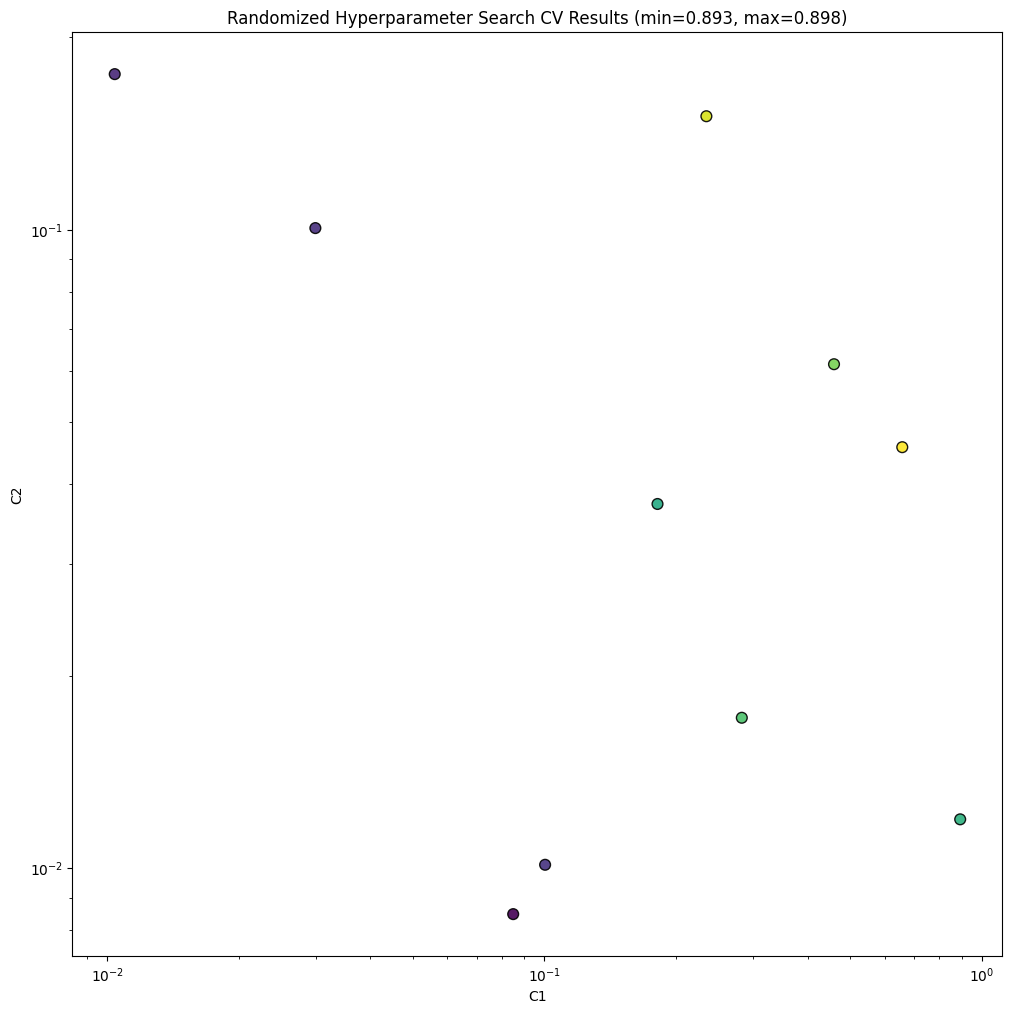

In [44]:
_x = [s['c1'] for s in rs.cv_results_['params']]
_y = [s['c2'] for s in rs.cv_results_['params']]
_c = [s for s in rs.cv_results_['mean_test_score']]
fig = plt.figure()
fig.set_size_inches(12, 12)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_title("Randomized Hyperparameter Search CV Results (min={:0.3}, max={:0.3})".format(
    min(_c), max(_c)
))

ax.scatter(_x, _y, c=_c, s=60, alpha=0.9, edgecolors=[0,0,0])

print("Dark blue => {:0.4}, dark red => {:0.4}".format(min(_c), max(_c)))

In [45]:

y_pred = rs.predict(X_test)
    
y_test_flat = flatten(y_test)
y_pred_flat = flatten(y_pred)
    
print(skmetrics.classification_report(y_test_flat, y_pred_flat))

              precision    recall  f1-score   support

        B-AC       0.85      0.89      0.87       270
        B-LF       0.64      0.51      0.57       150
         B-O       0.96      0.97      0.96      4292
        I-LF       0.73      0.67      0.70       288

    accuracy                           0.93      5000
   macro avg       0.79      0.76      0.77      5000
weighted avg       0.93      0.93      0.93      5000



In [48]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
params_space = {
    "c1": [0.1, 0.25,0.5,1],
    "c2": [0.1, 0.25,0.5,1]
}


f1_scorer = make_scorer(metrics.flat_f1_score,
                        average='weighted', labels=labels)

grids = GridSearchCV(estimator = crf, 
                     param_grid=params_space,
                        cv=3,
                        verbose=3,
                        n_jobs=-1,
                        scoring=f1_scorer,
                        return_train_score=True)
grids.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 2/3] END c1=0.1, c2=0.1;, score=(train=0.994, test=0.907) total time=   1.6s
[CV 1/3] END c1=0.1, c2=0.1;, score=(train=0.995, test=0.882) total time=   1.9s
[CV 2/3] END c1=0.1, c2=0.25;, score=(train=0.990, test=0.909) total time=   1.7s
[CV 3/3] END c1=0.1, c2=0.1;, score=(train=0.996, test=0.899) total time=   1.8s
[CV 3/3] END c1=0.1, c2=0.25;, score=(train=0.989, test=0.901) total time=   1.9s
[CV 1/3] END c1=0.1, c2=0.25;, score=(train=0.990, test=0.885) total time=   2.0s
[CV 2/3] END c1=0.1, c2=0.5;, score=(train=0.979, test=0.908) total time=   1.9s
[CV 1/3] END c1=0.1, c2=0.5;, score=(train=0.981, test=0.888) total time=   2.2s
[CV 3/3] END c1=0.1, c2=0.5;, score=(train=0.980, test=0.901) total time=   2.1s
[CV 1/3] END ..c1=0.1, c2=1;, score=(train=0.971, test=0.889) total time=   2.1s
[CV 2/3] END ..c1=0.1, c2=1;, score=(train=0.965, test=0.908) total time=   2.1s
[CV 3/3] END ..c1=0.1, c2=1;, score=(train=0.

GridSearchCV(cv=3,
             estimator=CRF(algorithm='lbfgs', all_possible_transitions=True,
                           c1=0.1, c2=0.1, max_iterations=100),
             n_jobs=-1,
             param_grid={'c1': [0.1, 0.25, 0.5, 1], 'c2': [0.1, 0.25, 0.5, 1]},
             return_train_score=True,
             scoring=make_scorer(flat_f1_score, response_method='predict', average=weighted, labels=['B-O', 'B-LF', 'I-LF', 'B-AC']),
             verbose=3)

In [49]:
#crf = rs.best_estimator_
print('best params:', grids.best_params_)
print('best CV score:', grids.best_score_)
print('model size: {:0.2f}M'.format(grids.best_estimator_.size_ / 1000000))

best params: {'c1': 0.5, 'c2': 0.5}
best CV score: 0.9001606467175421
model size: 0.50M


Dark blue => 0.9244, dark red => 0.995


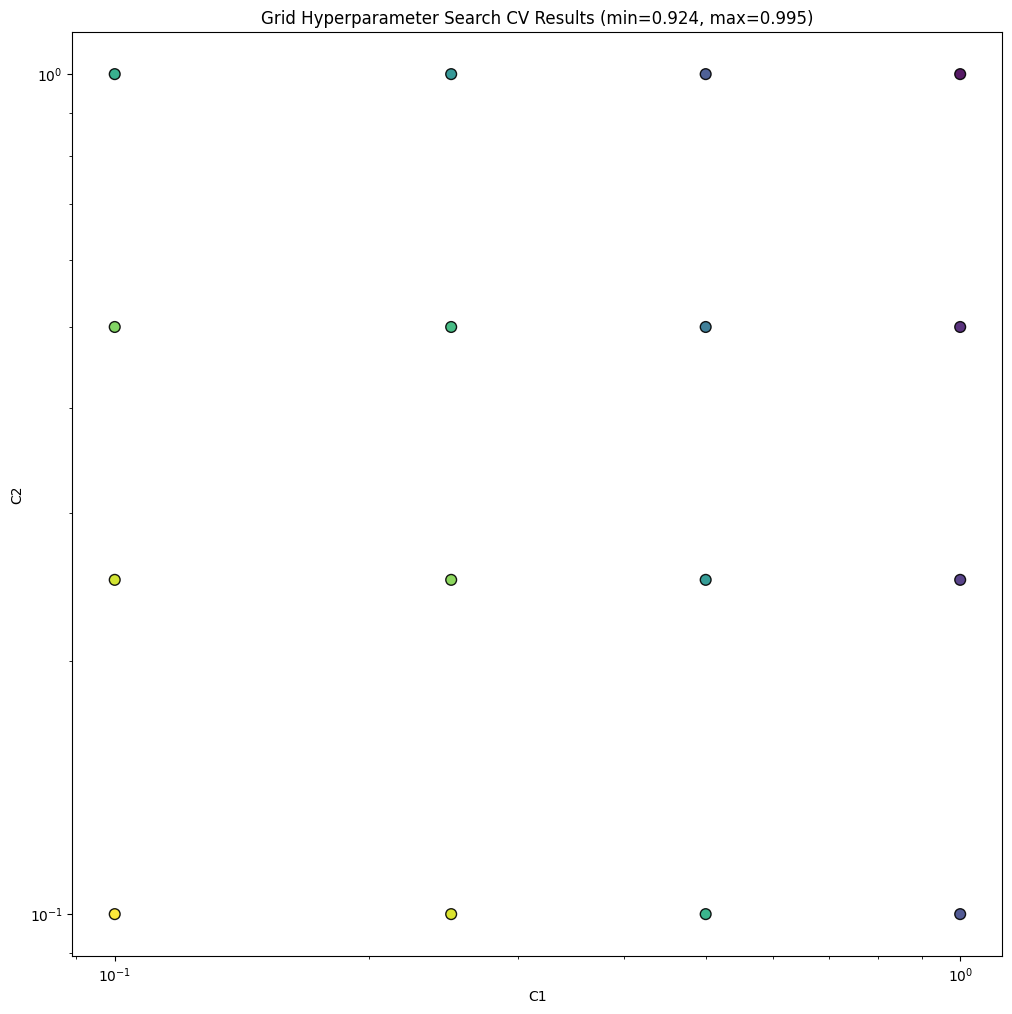

In [50]:
_x = [s['c1'] for s in grids.cv_results_['params']]
_y = [s['c2'] for s in grids.cv_results_['params']]
_c = [s for s in grids.cv_results_['mean_train_score']]
fig = plt.figure()
fig.set_size_inches(12, 12)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_title("Grid Hyperparameter Search CV Results (min={:0.3}, max={:0.3})".format(
    min(_c), max(_c)
))

ax.scatter(_x, _y, c=_c, s=60, alpha=0.9, edgecolors=[0,0,0])

print("Dark blue => {:0.4}, dark red => {:0.4}".format(min(_c), max(_c)))

In [51]:
y_pred = grids.predict(X_test)
    
y_test_flat = flatten(y_test)
y_pred_flat = flatten(y_pred)
    
print(skmetrics.classification_report(y_test_flat, y_pred_flat))

              precision    recall  f1-score   support

        B-AC       0.85      0.89      0.87       270
        B-LF       0.67      0.51      0.58       150
         B-O       0.96      0.97      0.96      4292
        I-LF       0.74      0.66      0.70       288

    accuracy                           0.93      5000
   macro avg       0.80      0.76      0.78      5000
weighted avg       0.93      0.93      0.93      5000



In [ ]:
# Number of vector elements (dimensions) to represent the word vector
num_features = 300
# Min number of word count to be considered in the Word2vec model. If your corpus is small, reduce the min count. If you’re training with a large corpus, increase the min count.
min_word_count = 1
# Number of CPU cores used for the training. If you want to set the number of cores dynamically, check out import multiprocessing:
#num_workers = multiprocessing.cpu_count()
num_workers = 2
# Context window size
window_size = 3
# Subsampling rate for frequent terms
subsampling = 1e-3

In [ ]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

temp_path = get_tmpfile('test_w2v')

epoch = datasets["train"].num_rows
for i in range(1, epoch+1): # epoch:
  model = Word2Vec(label_list, workers=2, vector_size=num_features, min_count=min_word_count, window=window_size, sample=subsampling)
  print("Model trained with " + str(i) + " epochs")
model_name = "NLPtestWord2Vec"
# I used wv function from the model to save it so that it remembers the mapping between words and vectors
#The reason for separating the trained vectors into KeyedVectors is that if you don’t need the full model state any more (don’t need to continue training), the state can discarded, resulting in a much smaller and faster object that can be mmapped for lightning fast loading and sharing the vectors in RAM between processes:
model.wv.save(temp_path)
modelxd = KeyedVectors.load(temp_path, mmap='r')

result = modelxd.wv.most_similar("human", topn=1)
print(result)
#model.load_state_dict(torch.load(path))

##Data Visualization

In [ ]:
import nltk
nltk.download('punkt')

##NLTK Bigrams Trigram

In [ ]:
%%time
bigram = gensim.models.Phrases(example, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[example], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
import spacy

# Form Bigrams
data_words_bigrams = make_bigrams(label_list)

print(data_words_bigrams)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['ADJ', 'ADP', 'ADV', 'AUX', 'CONJ', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X', 'SPACE'])

print(data_lemmatized[:1][0][:30])

In [ ]:
# visualizing bigrams
fig = px.bar(bigram_df[:20], x='ngram', y='count', title='Counts of top bigrams', template='plotly_white', labels={'ngram': 'Bigram', 'count': 'Count'})
fig.show()

In [ ]:
import gensim.corpora as corpora

data_pos = datasets['train'].features[f"pos_tags"].feature.names
print(data_pos)
# Create Dictionary
id2word = corpora.Dictionary(data_pos)

# Create Corpus
texts = data_pos

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

In [ ]:
from gensim.models import LdaModel

%%time
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=datasets,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)




from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]



### **Tokenizer**

Rudra Murthy, Mitesh M. Khapra, and Pushpak Bhattacharyya. 2018. Improving NER Tagging Performance in Low-Resource Languages via Multilingual Learning. ACM Trans. Asian Low-Resour. Lang. Inf. Process. 18, 2, Article 9 (June 2019), 20 pages. https://doi.org/10.1145/3238797


In [ ]:
from torchtext.data.utils import get_tokenizer

class SpacyTokenizer(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.tokenizer = get_tokenizer("spacy", language="en_core_web_sm")

    def forward(self, input):
        if isinstance(input, list):
            tokens = []
            for text in input:
                tokens.append(self.tokenizer(text))
            return tokens
        elif isinstance(input, str):
            return self.tokenizer(input)
        raise ValueError(f"Type {type(input)} is not supported.")

In [ ]:
tokenizer = SpacyTokenizer()
tokenized_input = tokenizer(example["tokens"])
print(tokenized_input)

https://radimrehurek.com/gensim/ gensim


In [ ]:
model = 'models/fastText/'

In [ ]:
#Hyperparams config
lr = 0.05
dim = 100
ws = 5
epoch = 5
minCount = 5
neg = 5
loss = 'ns'
t = 1e-4

params = {
    'alpha': lr,
    'size': dim,
    'window': ws,
    'iter': epoch,
    'min_count': minCount,
    'sample': t,
    'sg': 1,
    'hs': 0,
    'negative': neg
}


In [ ]:
from pprint import pprint as print
from gensim.models.fasttext import FastText
from gensim.test.utils import datapath

# Set file names for train and test data

model = FastText(vector_size=200)

# build the vocabulary
model.build_vocab(corpus_file=datasets)

# train the model
model.train(
    corpus_file=corpus_file, epochs=model.epochs,
    total_examples=model.corpus_count, total_words=model.corpus_total_words,
)
torch.save(model.state_dict(), path)
print(model)

model.load_state_dict(torch.load(path))